
**Milestone 1**
================







---





**Data Description:**
----------------------

The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid


* **LOAN:** Amount of loan approved.


* **MORTDUE:** Amount due on the existing mortgage.


* **VALUE:** Current value of the property.


* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)


* **JOB:** The type of job that loan applicant has such as manager, self, etc.


* **YOJ:** Years at present job.


* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).


* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).


* **CLAGE:** Age of the oldest credit line in months.


* **NINQ:** Number of recent credit inquiries.


* **CLNO:** Number of existing credit lines.


* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.









---





### **Import the necessary libraries**




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score,precision_recall_curve

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')


### **Read the dataset**




In [3]:
hm=pd.read_csv("hmeq.csv")

In [4]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()


### **Print the first and last 5 rows of the dataset**¶




In [5]:
# Display first five rows

data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [6]:
# Display last 5 rows
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519


### **Understand the shape of the dataset**




In [7]:
# Check the shape of the data

data.shape

(5960, 13)


**Insights**


* The dataset has **5960 rows and 13 columns.**





### **Check the data types of the columns**¶




In [8]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB



**Insights ******\_\_********


* The dataset comprises 5,960 loan application records with 13 features, primarily numerical, except for two categorical variables: REASON and JOB. The target variable BAD indicates loan default status, making this a binary classification problem. Several features such as DEBTINC, DEROG, and YOJ contain missing values, with DEBTINC missing over 21% of its entries, highlighting the need for careful imputation. Numeric features offer valuable insights into applicants’ financial behavior, including debt obligations (DEBTINC), credit history (CLAGE), and borrowing patterns (LOAN, MORTDUE, VALUE). Categorical fields like REASON and JOB may also significantly influence loan risk and should be encoded appropriately. Overall, the dataset is well-suited for building predictive models to assess creditworthiness and identify potential loan defaults.





### **Check for missing values**




In [9]:
# Analyse missing values 
data.isnull()

BAD   LOAN  MORTDUE  VALUE  REASON    JOB    YOJ  DEROG  DELINQ  \
0     False  False    False  False   False  False  False  False   False   
1     False  False    False  False   False  False  False  False   False   
2     False  False    False  False   False  False  False  False   False   
3     False  False     True   True    True   True   True   True    True   
4     False  False    False  False   False  False  False  False   False   
...     ...    ...      ...    ...     ...    ...    ...    ...     ...   
5955  False  False    False  False   False  False  False  False   False   
5956  False  False    False  False   False  False  False  False   False   
5957  False  False    False  False   False  False  False  False   False   
5958  False  False    False  False   False  False  False  False   False   
5959  False  False    False  False   False  False  False  False   False   

      CLAGE   NINQ   CLNO  DEBTINC  
0     False  False  False     True  
1     False  False  False     True  
2     False  False  False     True  
3      True   True   True     True  
4     False  False  False     True  
...     ...    ...    ...      ...  
5955  False  False  False    False  
5956  False  False  False    False  
5957  False  False  False    False  
5958  False  False  False    False  
5959  False  False  False    False  

[5960 rows x 13 columns]

In [10]:
# Check the percentage of missing values in the each column.


data.isnull().sum() / data.shape[0]*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64


**Insights**


* All variables in the dataset contain missing values except for BAD (the target variable) and LOAN. The most affected features are DEBTINC and DEROG, with missing rates of approximately 21.26% and 11.88% respectively, followed by DELINQ, MORTDUE, YOJ, and NINQ, each with around 8–10% missing data. The categorical variables REASON and JOB also have moderate missingness, at 4.23% and 4.68% respectively. Although the missing percentages for most features are manageable, the high proportion of missing values in DEBTINC and DEROG requires special attention, such as careful imputation or possible exclusion depending on the modeling strategy. Understanding the pattern and extent of missingness is crucial before proceeding with data preprocessing and model building.




* Missing data reduces the power of a model. Before taking decision how to deal with missing data, it's important to consider the percentage of missing. Because whatever method you use to replace the data, it won't eliminate the bias. The higher the percentage of missing data is the higher the data inconsistence can be.


* Theoretically, 25 to 30% is the maximum missing values are allowed, beyond which we might want to drop the variable from analysis.





### **Convert the data types**¶




In [11]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [12]:
cols

['REASON', 'JOB', 'BAD']

In [13]:
# Changing the data type of object type column to category. hint use astype() function

for i in cols:
    data[i] = data[i].astype('category')

In [14]:
# Checking the info again and the datatype of different variable

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB



### **Analyze Summary Statistics of the dataset**




In [15]:
# Analyze the summary statistics for numerical variables

data.describe().T

count           mean           std          min           25%  \
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149


**Insights ******\_\_********





This dataset provides financial and credit-related information for 5,960 loan applicants. Below are the main statistical insights derived from the numerical features:

- **`LOAN`**: Loan amounts range from ~$1,100 to $89,900, with a mean of ~$18,608.  The large gap between the 75th percentile (~$23,300) and the maximum suggests a small number of disproportionately large loans.
  
- **`MORTDUE`**: The **median amount due on existing mortgages** is approximately **$65,019**, indicating typical debt loads for homeowners.

- **`VALUE`**: Property values have a **median of ~$89,236**, which helps gauge applicants' home equity levels.

- **`YOJ`** (*Years at Current Job*): Applicants have been at their current job for an average of **9 years**, with a range of **0 to 41 years**, indicating a broad spectrum of job stability.

- **`DEROG`**: The average number of **major derogatory reports** is **0.25**, with a high standard deviation and a maximum of **10**, reflecting that while most applicants have no such reports, a few have significant credit issues.

- **`DELINQ`**: The average number of **delinquent credit lines** is **0.45**, with a maximum of **15**, again suggesting that most applicants are in good standing, but a minority present high risk.

- **`CLAGE`** (*Age of Oldest Credit Line*): The average age is **~180 months (15 years)**, showing most applicants have long-established credit histories. The maximum exceeds **1168 months**, which may include outliers or data entry anomalies.

- **`DEBTINC`** (*Debt-to-Income Ratio*): The average ratio is **~33.8%**, which is within typical lending thresholds. However, some values exceed **200%**, indicating severe financial overextension in some cases.



In [16]:
# Check summary for categorical data 

data.describe(include=['category']).T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388


**Insights**


- **`BAD`**: The value `0` is the most frequent category, appearing in **4771 out of 5960** entries (~80%). This indicates that the majority of applicants **did not default** on their loans, suggesting a relatively healthy applicant pool.

- **`REASON`**: Among the 5,708 non-null entries, the most common reason for applying for a loan is **Debt Consolidation (`DebtCon`)**, representing **~69% (3928/5708)** of the cases. This implies that consolidating existing debts is the **primary motivation** for loan applications.

- **`JOB`**: Out of 5,681 entries, there are **6 distinct job categories**, with **"Other"** being the most common, representing **~42% (2388/5681)** of the cases. This suggests a wide range of occupations, many of which may not fall into traditional job classifications.



**Let's look at the unique values in all the categorical variables**




In [17]:
# Checking the count of unique values in each categorical column 

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(normalize = True))
    print('*'*40)

Unique values in BAD are :
0    0.800503
1    0.199497
Name: BAD, dtype: float64
****************************************
Unique values in REASON are :
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
****************************************
Unique values in JOB are :
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
****************************************



**Insights**


- **`BAD`**: Approximately **80%** of loan applicants fall under category `0`, meaning **only 20%** of the loans resulted in default. This suggests that the majority of applicants were considered **low-risk** or their applications were **approved and successfully repaid**.

- **`REASON`**: About **69%** of applicants selected **Debt Consolidation (`DebtCon`)** as the reason for their loan, while the remaining **31%** applied for **Home Improvement (`HomeImp`)**. This indicates that **credit payment restructuring** is the primary motivation for seeking loans.

- **`JOB`**: The job category **"Other"** accounts for **~42%** of the applicants, followed by **Professional/Executive (22%)**, **Office (17%)**, and **Managerial (13.5%)** roles. The dominance of the "Other" category suggests that many applicants either have **non-traditional occupations** or job roles that are **not well-categorized** by the system, potentially impacting the decision-making process in loan approvals.





- The results above provide the **absolute and relative frequencies** of each category in the categorical variables. While helpful for understanding the overall distribution of individual features, **absolute counts alone are not sufficient** to extract deeper insights from the data.

- To go beyond basic frequency analysis, it is important to explore:
  - **Univariate Analysis**: Examining each variable individually to understand its distribution, detect skewness, outliers, or dominant categories.
  - **Bivariate Analysis**: Exploring relationships between variables (e.g., how `REASON` or `JOB` relate to `BAD`) using tools such as:
    - Cross-tabulations
    - Grouped bar charts
    - Box plots for numerical vs. categorical relationships
    - Correlation matrices for numerical variables

By implementing these techniques, we can gain a better understanding of how different features interact and influence the target variable, ultimately improving the quality of feature selection and model performance.



**Exploratory Data Analysis (EDA) and Visualization**
------------------------------------------------------





**Univariate Analysis**
------------------------

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables





### **1. Univariate Analysis - Numerical Data**

Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.




In [18]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram


#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN




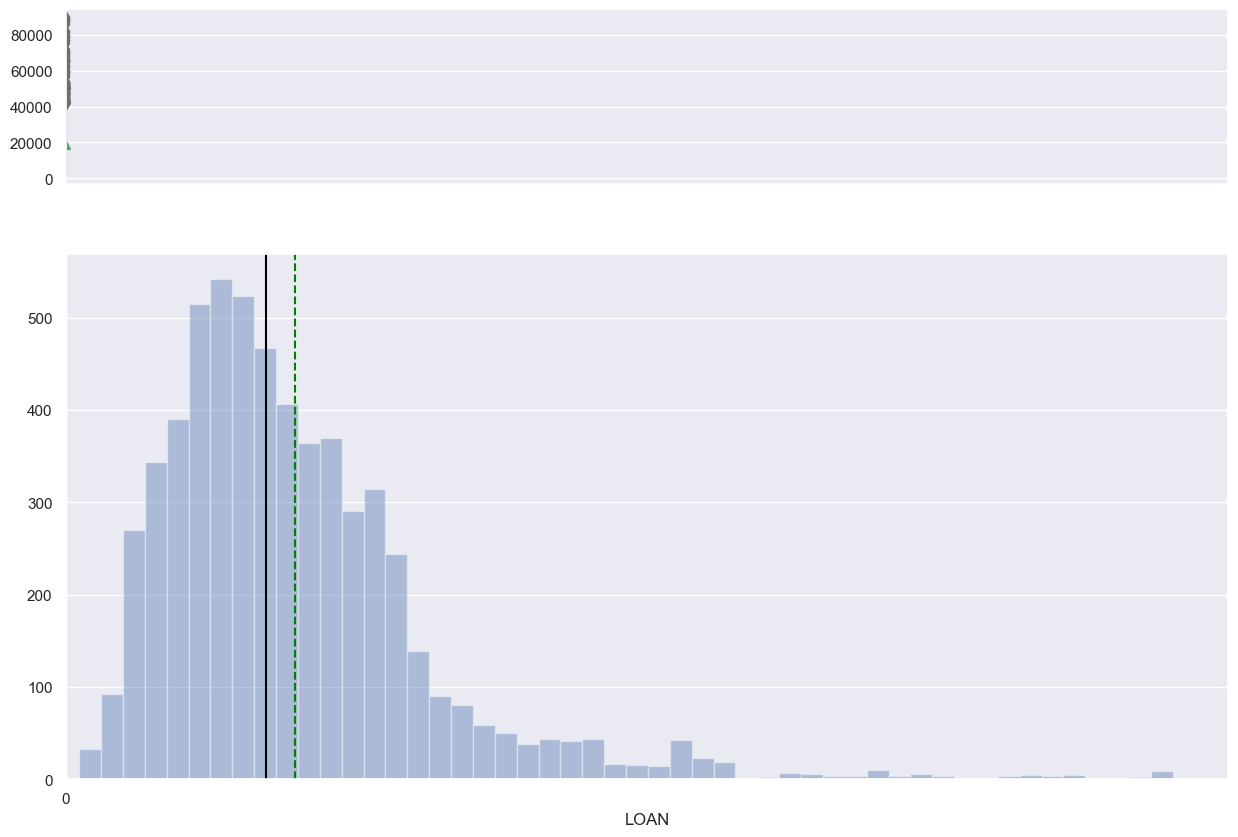

In [19]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])


**Insights ***\_\_*****


The LOAN distribution is close to a normal distribution, with a right skewed and many outliers. The majority of the loans are between 15000 and 400000.





#### **Note:** As done above, analyze Histogram and Boxplot for other variables




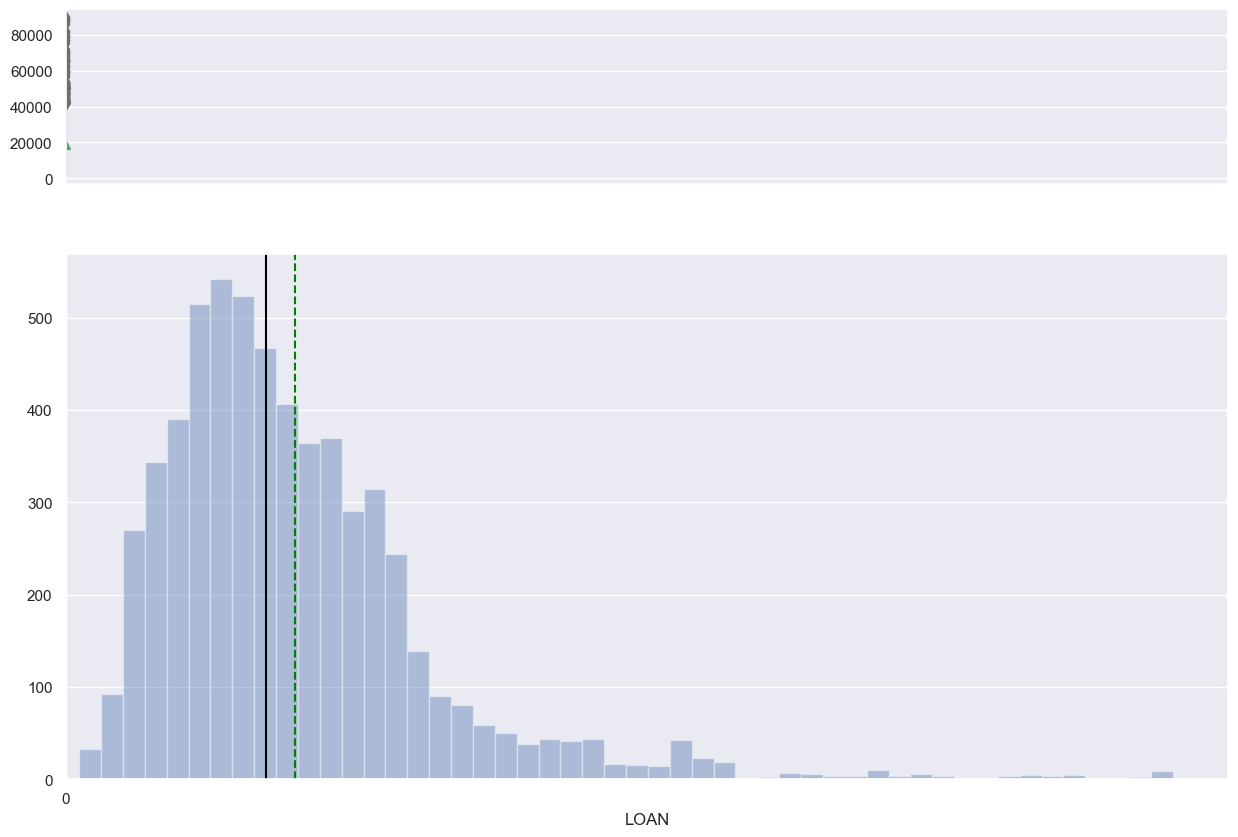

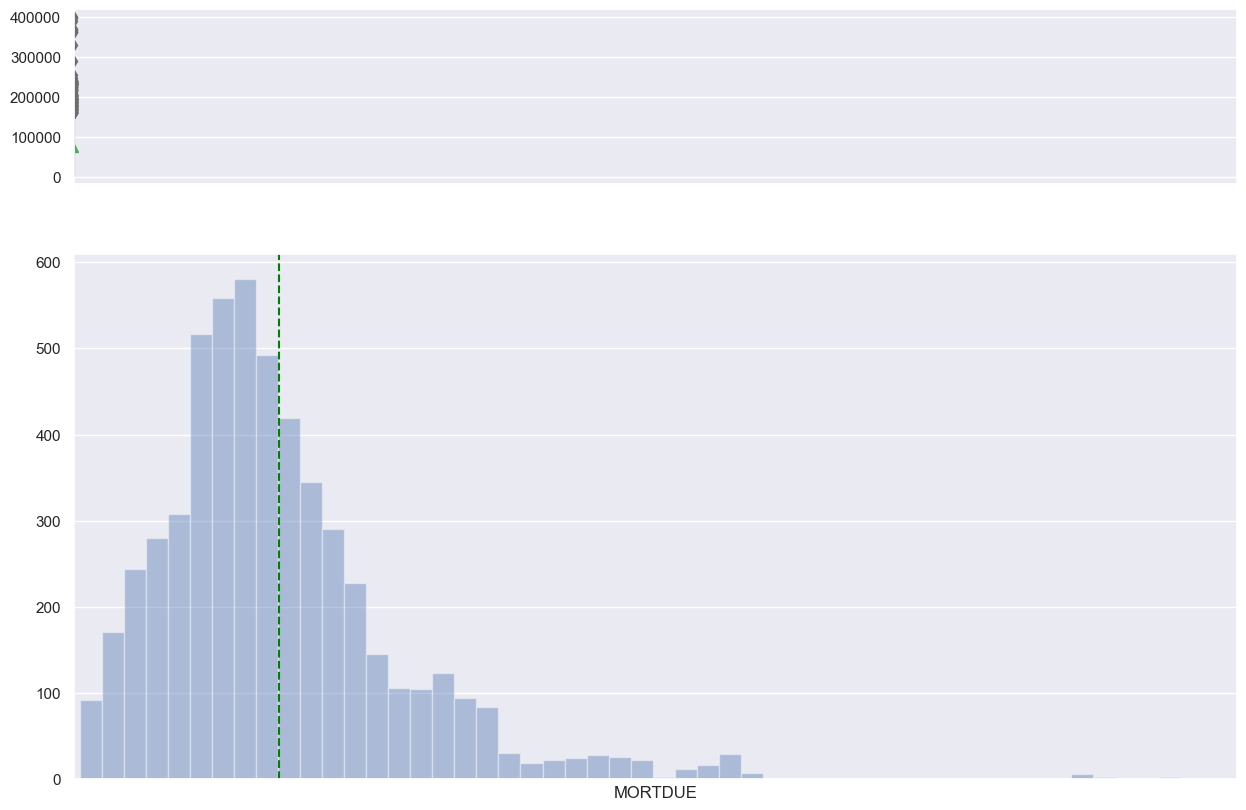

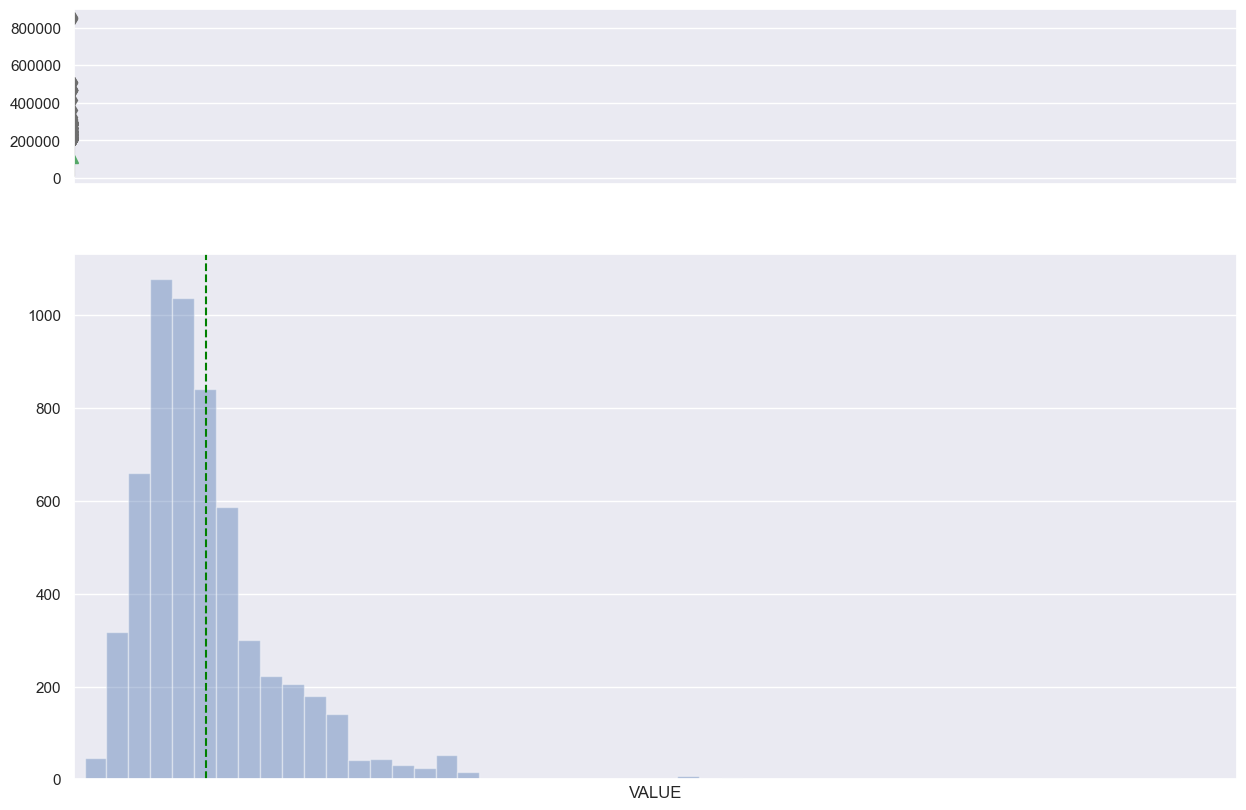

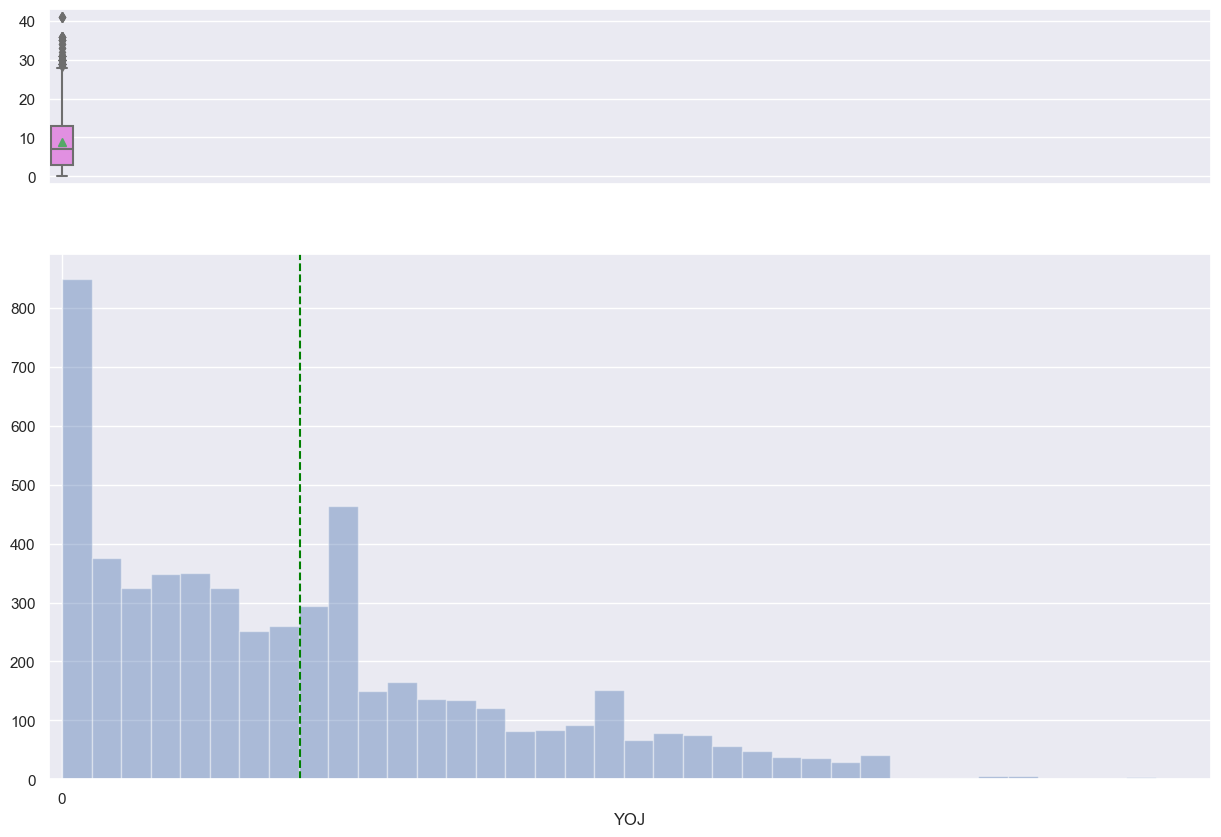

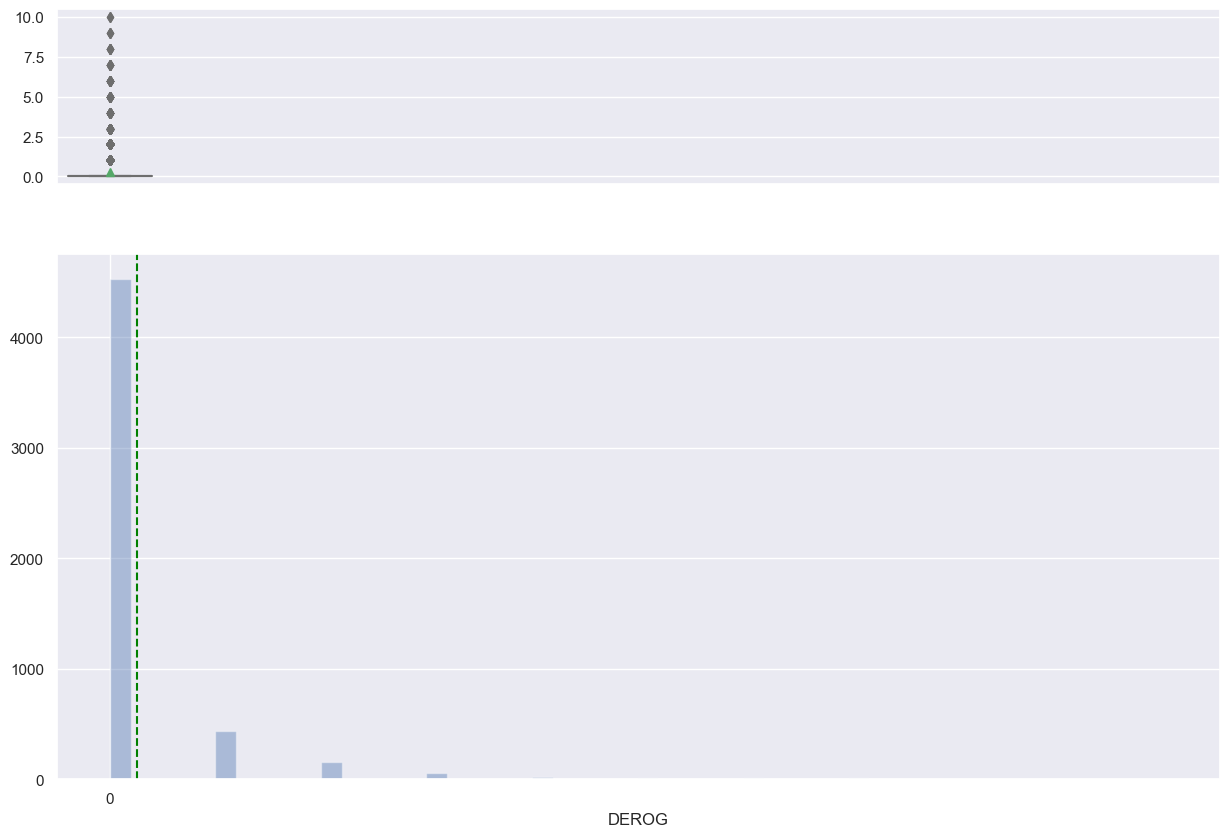

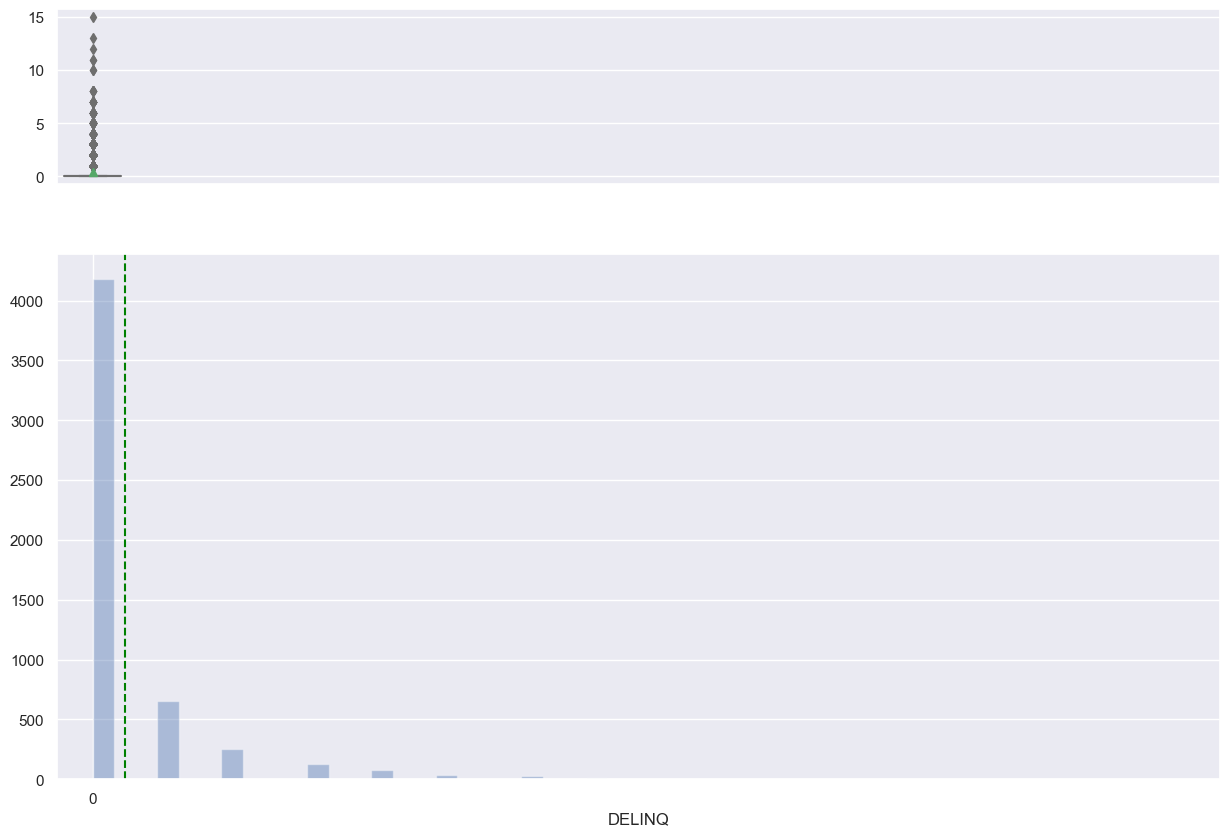

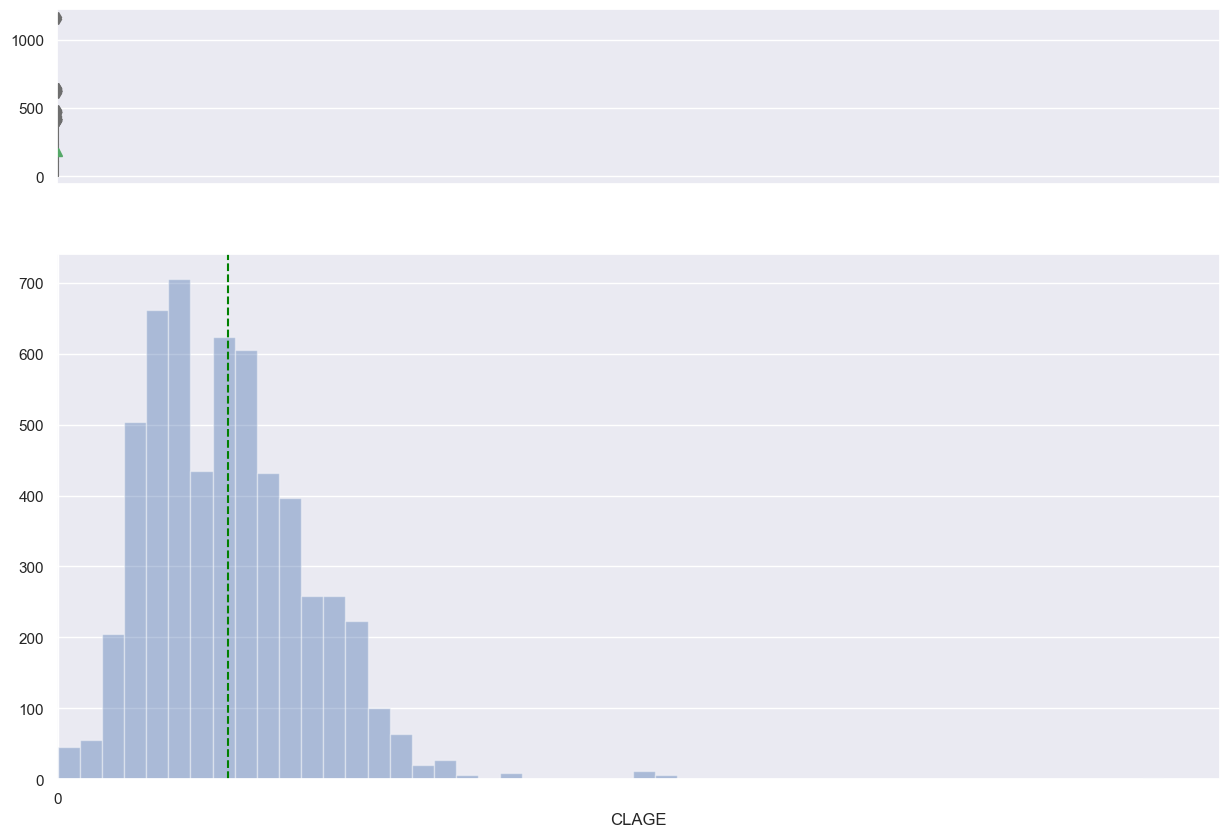

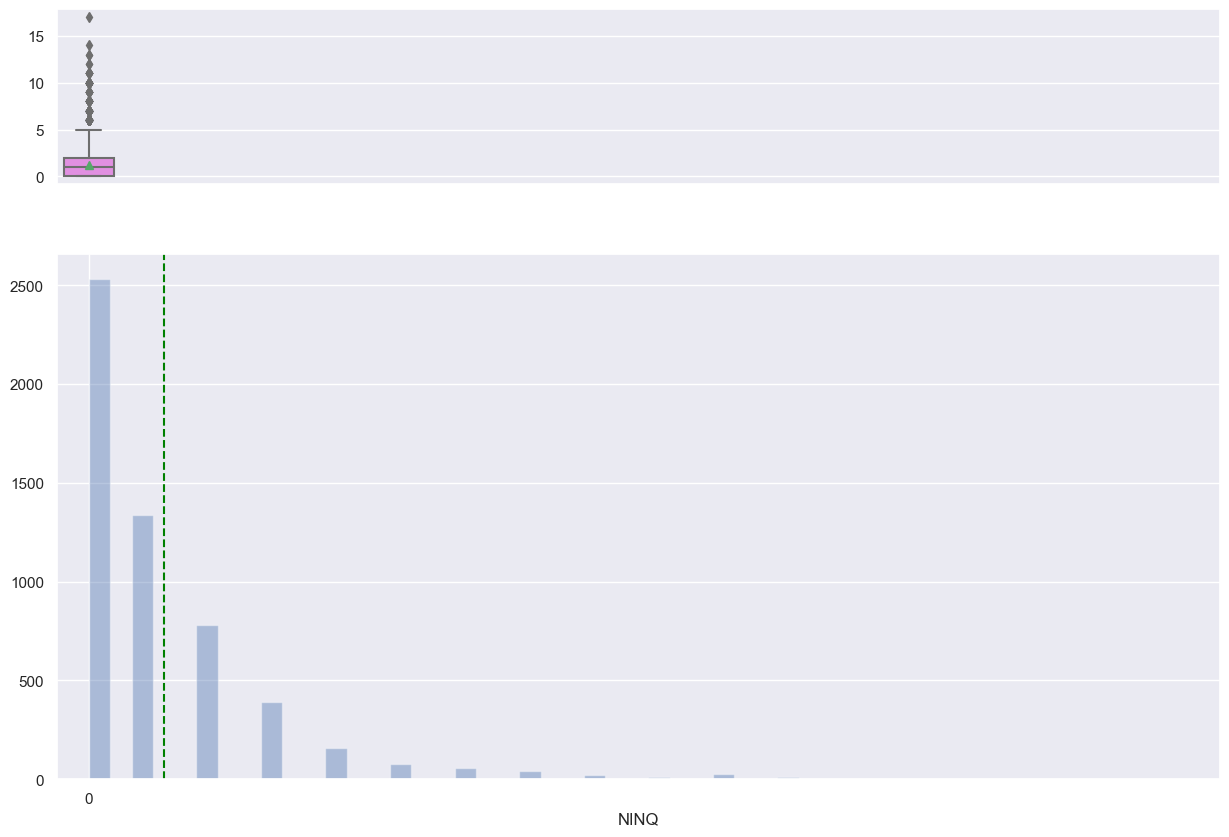

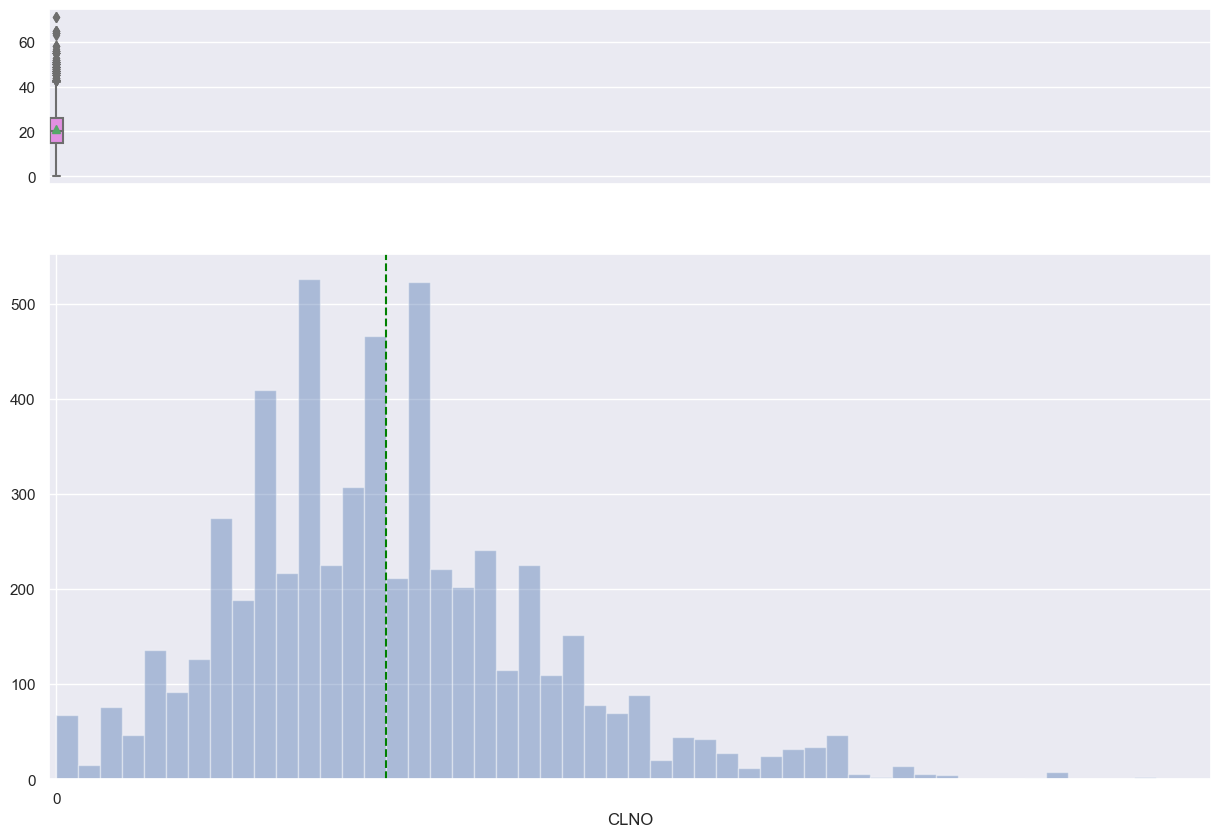

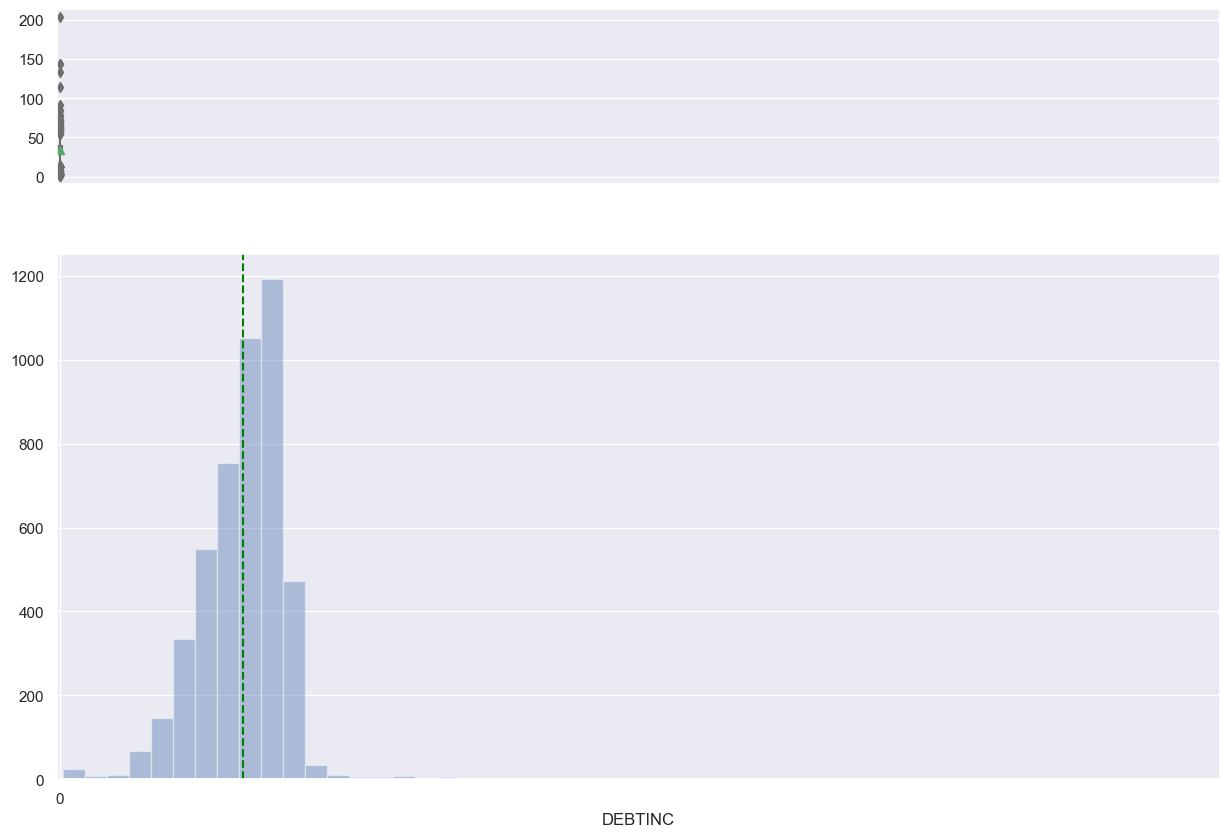

In [20]:
columns= data.select_dtypes(['number'])
for i in columns:
    histogram_boxplot(data[i])


**Insights *****\_\_*******


* The variables **LOAN** distribution is close to a normal distribution, with a right skewed and many outliers. The majority of LOAN asked are between 4k to 26K approximately. That's mean very few people ask for high amount of loans. Most the amount due on the existing mortgage are bellow to 100K.


* The variable **YOJ** is skewed to the right, which means the loan applicants spent time some in their current job before they apply even though we have a pic at 0 year at the present job.


* The variables **MORTDUE** distribution is close to a normal distribution, with a right skewed and many outliers. Most the amount due on the existing mortgage are bellow to 100K.


* The variables **VALUE** distribution is close to a normal distribution, with a right skewed and many outliers. Moste of the value of the property are between 10K and 15k.


* The variables **CLAGE** distribution is close to a normal distribution, with a right skewed and many outliers.


* The variables **CLNO** distribution is close to a normal distribution, with a right skewed and many outliers. The majority of applicants have approximately between 10 and 27 existing credit lines. That show the apply are in debt. This can also justify the discrepancy between the value of the loans and the value of the property.







### **2. Univariate Analysis - Categorical Data**




In [21]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot


#### Analyze Barplot for DELINQ




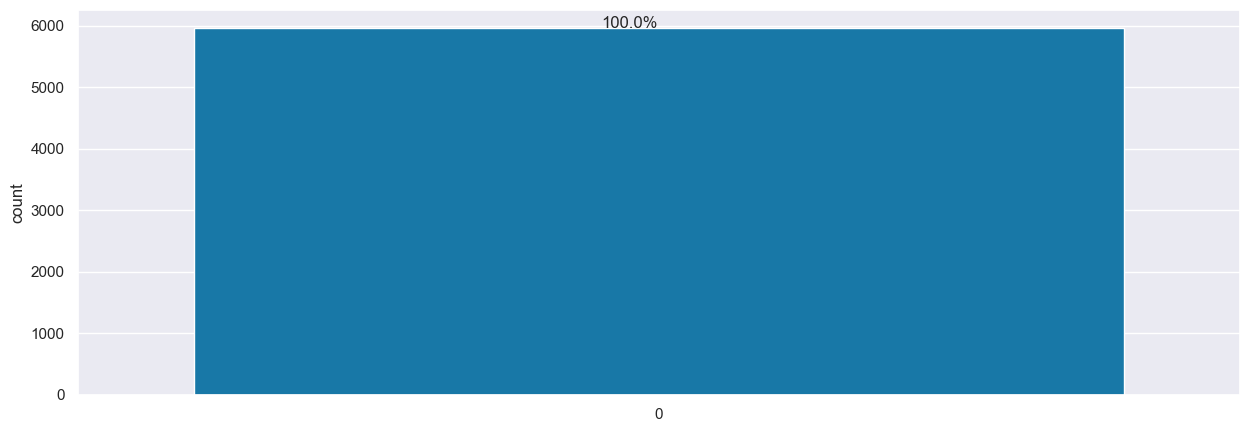

In [22]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])


#### **Note:** As done above, analyze Histogram and Boxplot for other variables.¶




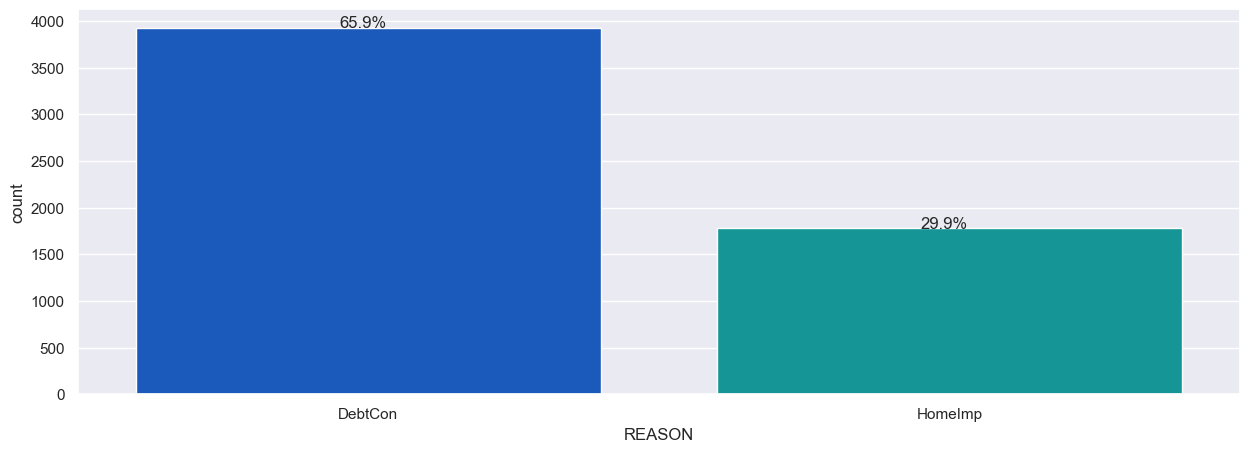

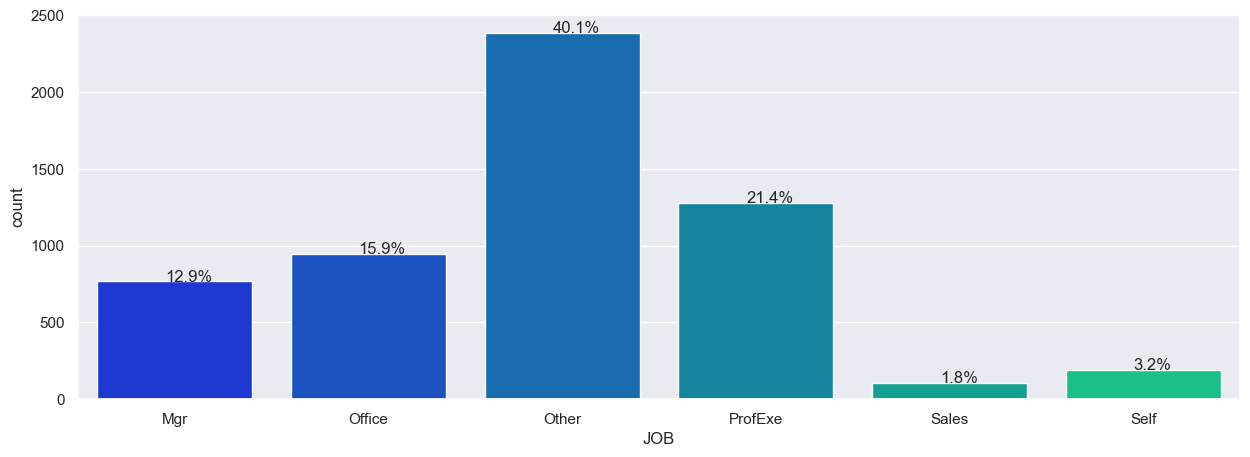

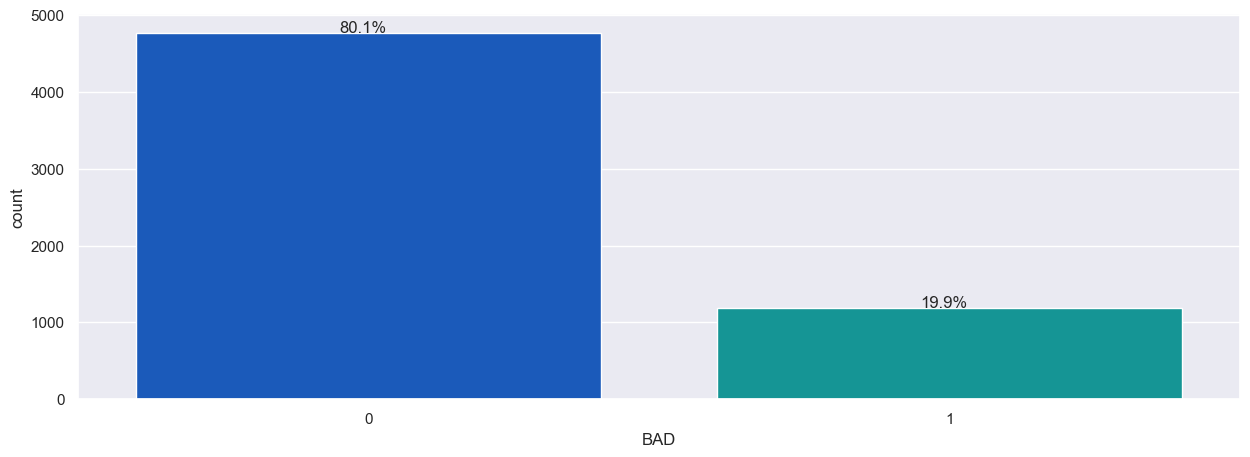

In [23]:
for i in cols:
    
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=data[i],palette='winter')
    perc_on_bar(ax,data[i])


**Insights**


- **`BAD` (Loan Default Status)**:
  - **80.1%** of the loan applicants fall into category `0`, meaning their loans were **not in default**.
  - Only **19.9%** of applicants defaulted, suggesting a generally low-risk applicant pool.

- **`REASON` (Loan Purpose)**:
  - The most common reason for applying is **Debt Consolidation**, representing **65.9%** of the cases.
  - **Home Improvement** accounts for **29.9%**, indicating that most borrowers are trying to **restructure or manage existing debt** rather than invest in property.

- **`JOB` (Employment Category)**:
  - The most frequent job category is **Other** at **40.1%**, which may reflect a wide range of uncategorized or unconventional occupations.
  - **Professional/Executive** jobs follow at **21.4%**, while **Office** and **Managerial** roles make up **15.9%** and **12.9%**, respectively.
  - **Sales** and **Self-employed** categories are less common, comprising **1.8%** and **3.2%** of the data, respectively.





**Bivariate Analysis**
-----------------------





### **Bivariate Analysis: Continuous and Categorical Variables**¶





#### Analyze BAD vs Loan¶




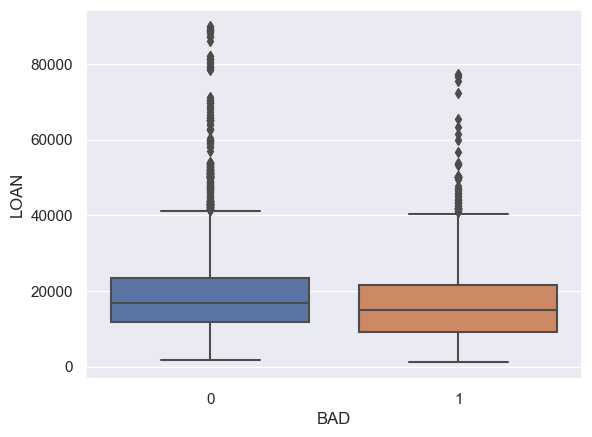

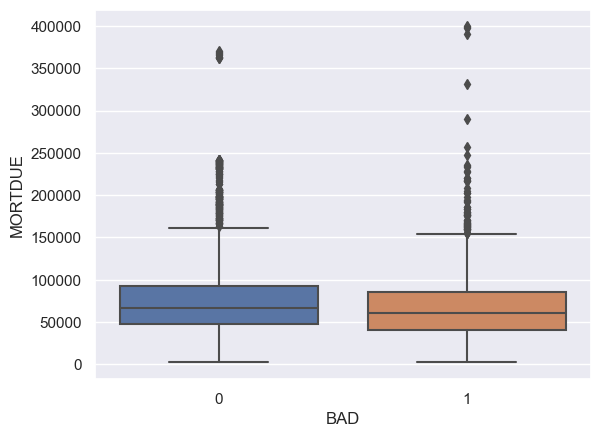

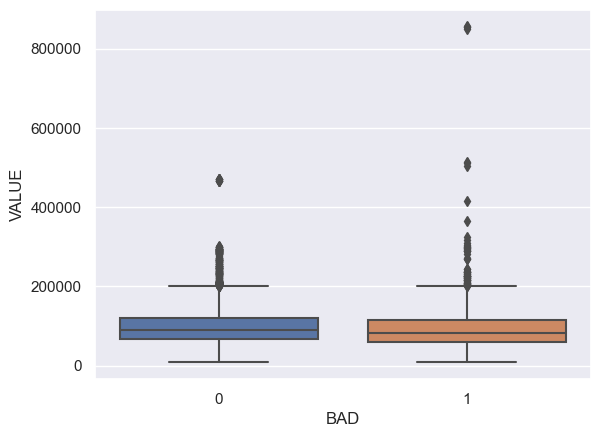

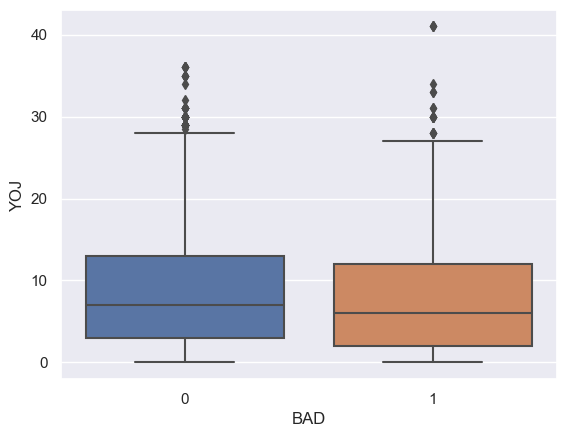

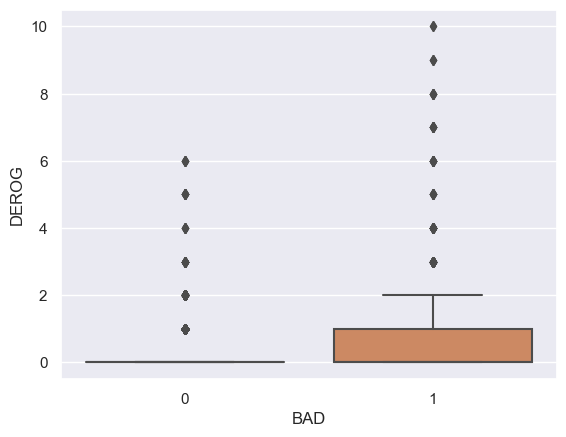

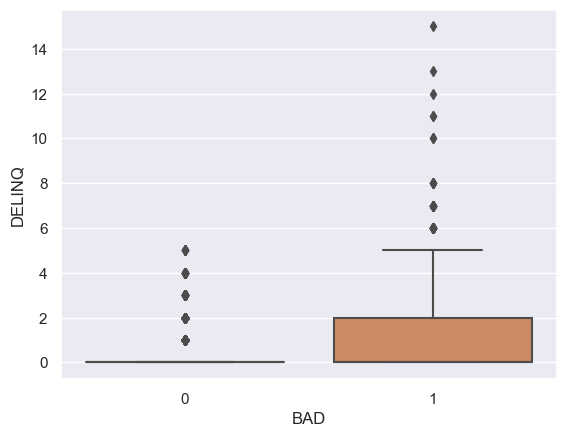

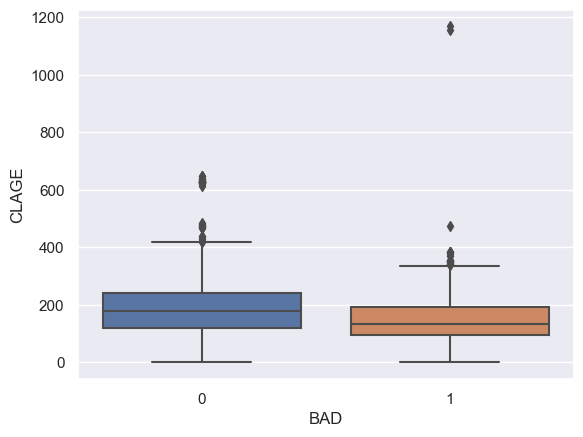

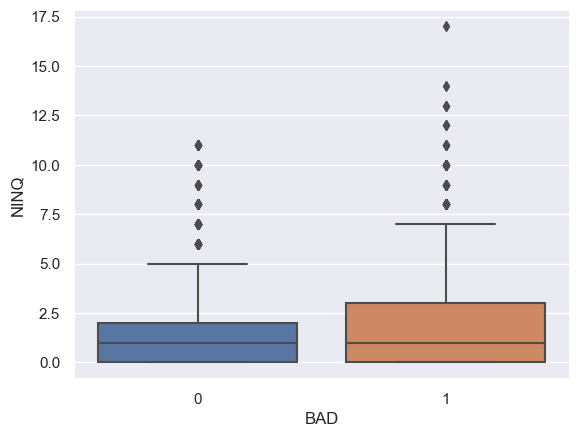

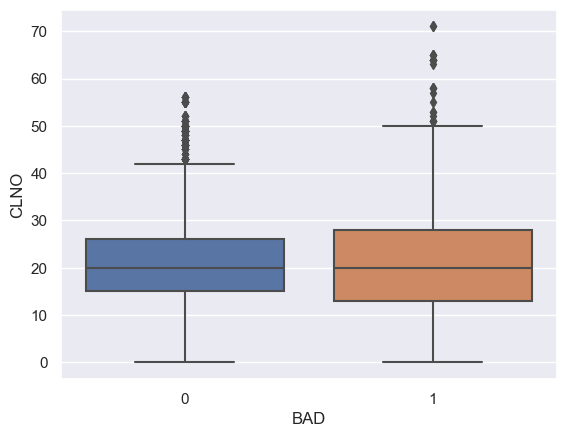

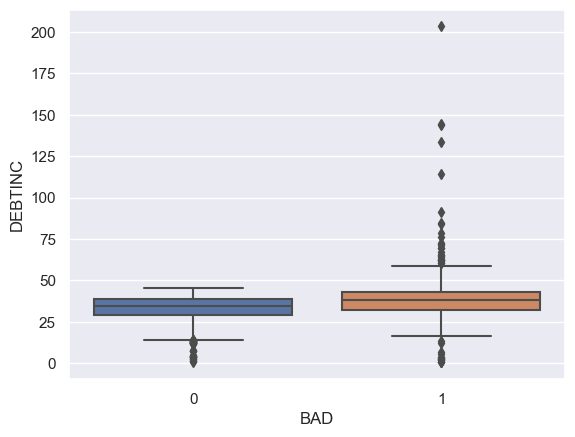

In [24]:
for i in columns: 
    sns.boxplot(x="BAD", y=i, data=data)
    plt.show()


**Insights**


The boxplot analysis reveals that several numerical features show meaningful differences between defaulters (`BAD = 1`) and non-defaulters (`BAD = 0`). Defaulters generally have lower years on the job (`YOJ`), more derogatory marks (`DEROG`), higher delinquency counts (`DELINQ`), more recent credit inquiries (`NINQ`), and slightly higher debt-to-income ratios (`DEBTINC`), suggesting financial instability and higher credit risk. While loan amount (`LOAN`), mortgage due (`MORTDUE`), and property value (`VALUE`) appear similarly distributed across both groups, features like credit line age (`CLAGE`) are longer for non-defaulters, indicating more mature credit histories. Overall, variables such as `DEROG`, `DELINQ`, `NINQ`, `YOJ`, and `DEBTINC` are strong indicators of default behavior and should be emphasized in predictive modeling.





#### **Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables





### **Bivariate Analysis: Two Continuous Variables**¶




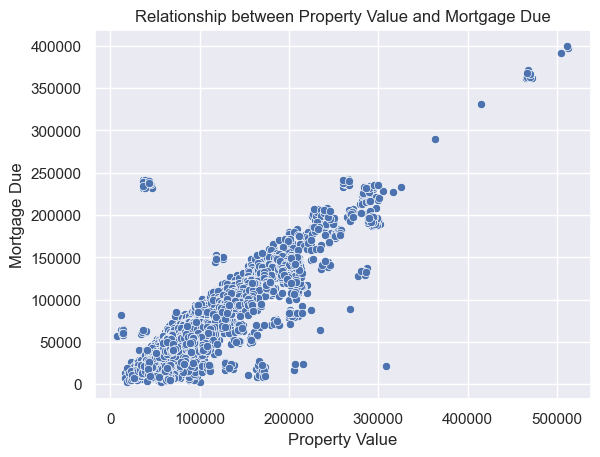

In [25]:
sns.scatterplot(x=data["VALUE"], y=data["MORTDUE"], palette="PuBu")
plt.title("Relationship between Property Value and Mortgage Due")
plt.xlabel("Property Value")
plt.ylabel("Mortgage Due")
plt.show()


#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables¶




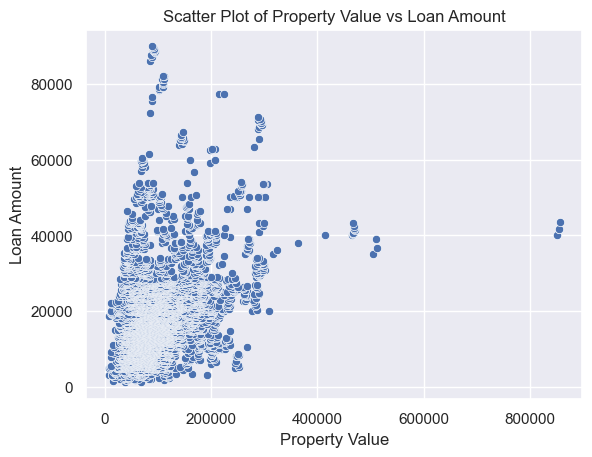

In [26]:
sns.scatterplot(x=data["VALUE"], y=data["LOAN"], palette="PuBu")
plt.title("Scatter Plot of Property Value vs Loan Amount")
plt.xlabel("Property Value")
plt.ylabel("Loan Amount")
plt.show()


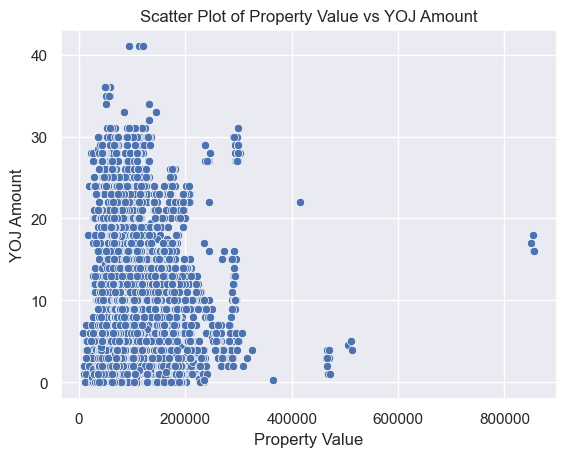

In [27]:
sns.scatterplot(x=data["VALUE"], y=data["YOJ"], palette="PuBu")
plt.title("Scatter Plot of Property Value vs YOJ Amount")
plt.xlabel("Property Value")
plt.ylabel("YOJ Amount")
plt.show()


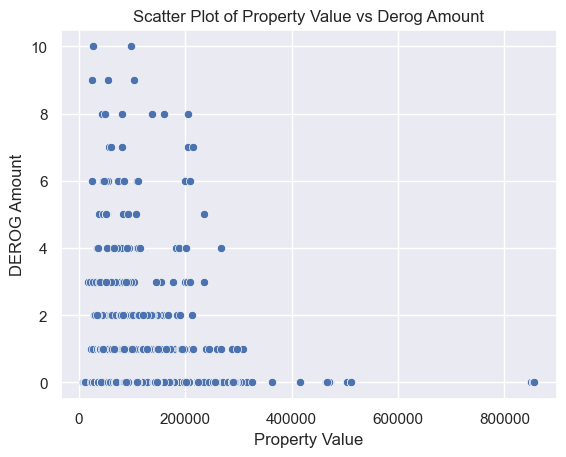

In [28]:
sns.scatterplot(x=data["VALUE"], y=data["DEROG"], palette="PuBu")
plt.title("Scatter Plot of Property Value vs Derog Amount")
plt.xlabel("Property Value")
plt.ylabel("DEROG Amount")
plt.show()


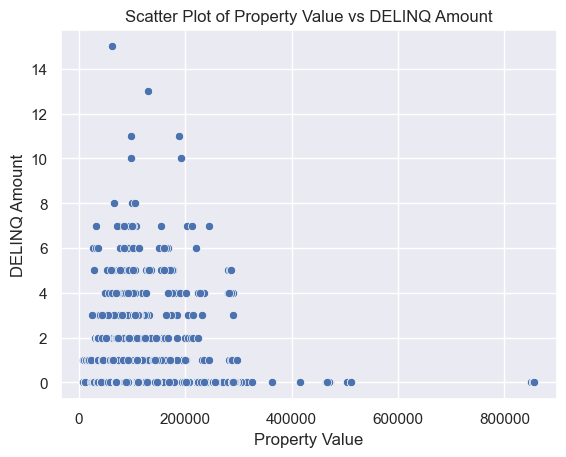

In [29]:
sns.scatterplot(x=data["VALUE"], y=data["DELINQ"], palette="PuBu")
plt.title("Scatter Plot of Property Value vs DELINQ Amount")
plt.xlabel("Property Value")
plt.ylabel("DELINQ Amount")
plt.show()

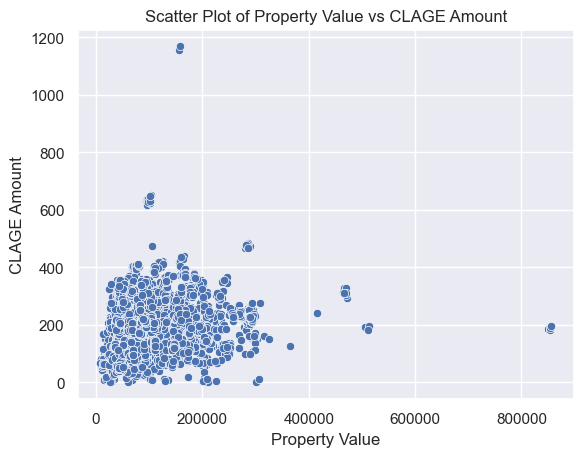

In [30]:
sns.scatterplot(x=data["VALUE"], y=data["CLAGE"], palette="PuBu")
plt.title("Scatter Plot of Property Value vs CLAGE Amount")
plt.xlabel("Property Value")
plt.ylabel("CLAGE Amount")
plt.show()

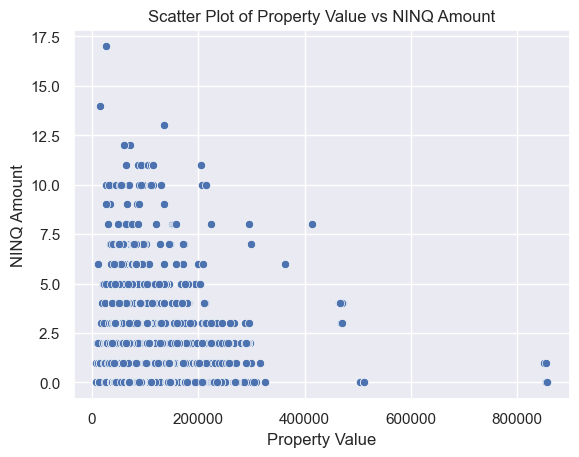

In [31]:
sns.scatterplot(x=data["VALUE"], y=data["NINQ"], palette="PuBu")
plt.title("Scatter Plot of Property Value vs NINQ Amount")
plt.xlabel("Property Value")
plt.ylabel("NINQ Amount")
plt.show()

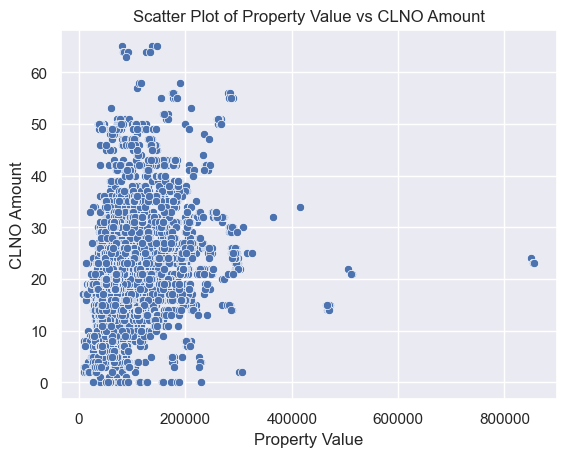

In [32]:
sns.scatterplot(x=data["VALUE"], y=data["CLNO"], palette="PuBu")
plt.title("Scatter Plot of Property Value vs CLNO Amount")
plt.xlabel("Property Value")
plt.ylabel("CLNO Amount")
plt.show()



**Insights:**


The scatterplot analysis shows a strong positive correlation between `VALUE` (Property Value) and `MORTDUE` (Mortgage Due), as expected—higher-value properties tend to have higher mortgage balances. Similarly, `VALUE` is positively associated with `LOAN`, `YOJ`, `CLAGE`, and `CLNO`, indicating that individuals owning more valuable properties generally request larger loans, have more years on the job, longer-established credit histories, and a greater number of credit lines. This makes intuitive sense as property value often aligns with financial maturity and credit exposure. However, the plot of `LOAN` vs `VALUE` displays a relatively weak spread with a high density of points clustered at lower values and some missing correlations, hinting at either data gaps or more nuanced approval patterns. Additionally, there appears to be no clear relationship between `VALUE` and risk indicators like `DEROG`, `DELINQ`, and `NINQ`, which suggests these credit risk variables are largely independent of property value.






### Bivariate Analysis: BAD vs Categorical Variables





**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.




In [33]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()


#### Plot stacked bar plot for for LOAN and REASON




BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


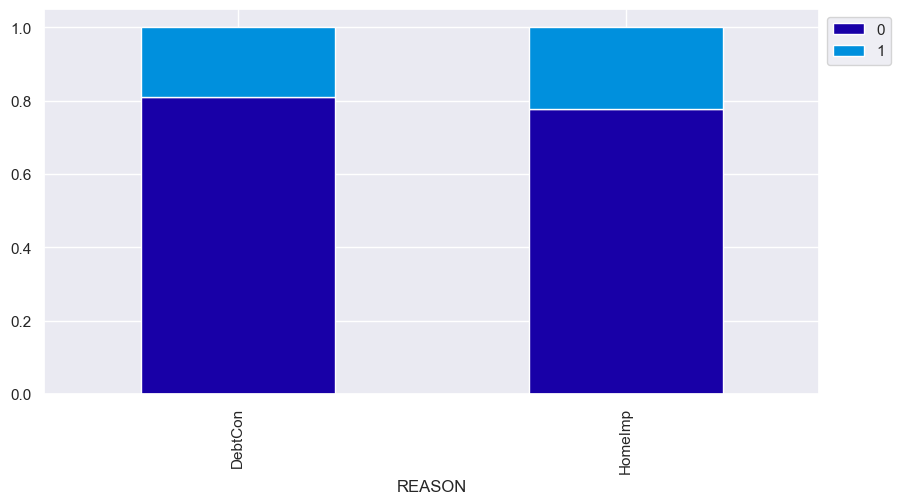

In [34]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])


**Insights:**

The chart reveals that loans requested for **Debt Consolidation (`DebtCon`)** are slightly **more likely to be accepted** (i.e., associated with `BAD = 0`) compared to those requested for **Home Improvement (`HomeImp`)**. In both cases, the majority of loans are approved, but the **approval rate is higher for DebtCon** applicants. This suggests that lenders may view debt consolidation as a **less risky or more justifiable reason** for borrowing, possibly because it is aimed at improving overall financial stability rather than incurring new expenses.




#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD




BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


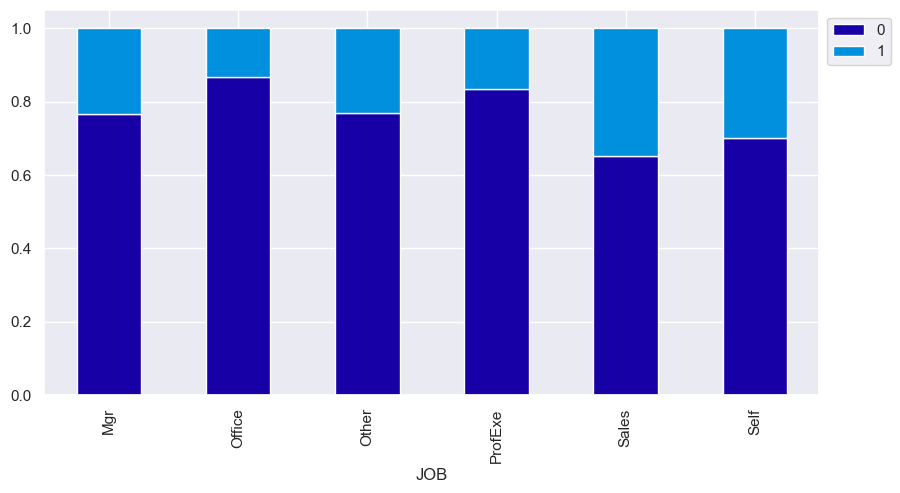

In [35]:
stacked_plot(data['JOB'])


**Insights:**

The stacked bar chart and accompanying table show how loan default (`BAD = 1`) varies across different job categories:

- **Sales** and **Self-employed** applicants have the **highest default rates**, at approximately **34.9%** (`38/109`) and **30.1%** (`58/193`) respectively. This suggests that individuals in these roles are **more likely to default** on their loans, possibly due to variable or less stable income sources.
  
- In contrast, **Office** and **ProfExe** applicants have relatively **lower default rates**, around **13.2%** (`125/948`) and **16.6%** (`212/1276`), indicating that applicants with more structured and higher-income positions are **less likely to default** and more likely to be approved.

- **Managerial (Mgr)** and **Other** job categories fall in between, with moderate default rates of **~23.3%** and **~23.2%** respectively.

Thus, contrary to the initial interpretation, **Office and ProfExe applicants are actually less likely to default**, while **Sales and Self-employed applicants are at higher risk**. This supports the idea that **job stability and type have a significant influence** on loan default likelihood.




### **Multivariate Analysis**





#### Analyze Correlation Heatmap for Numerical Variables¶




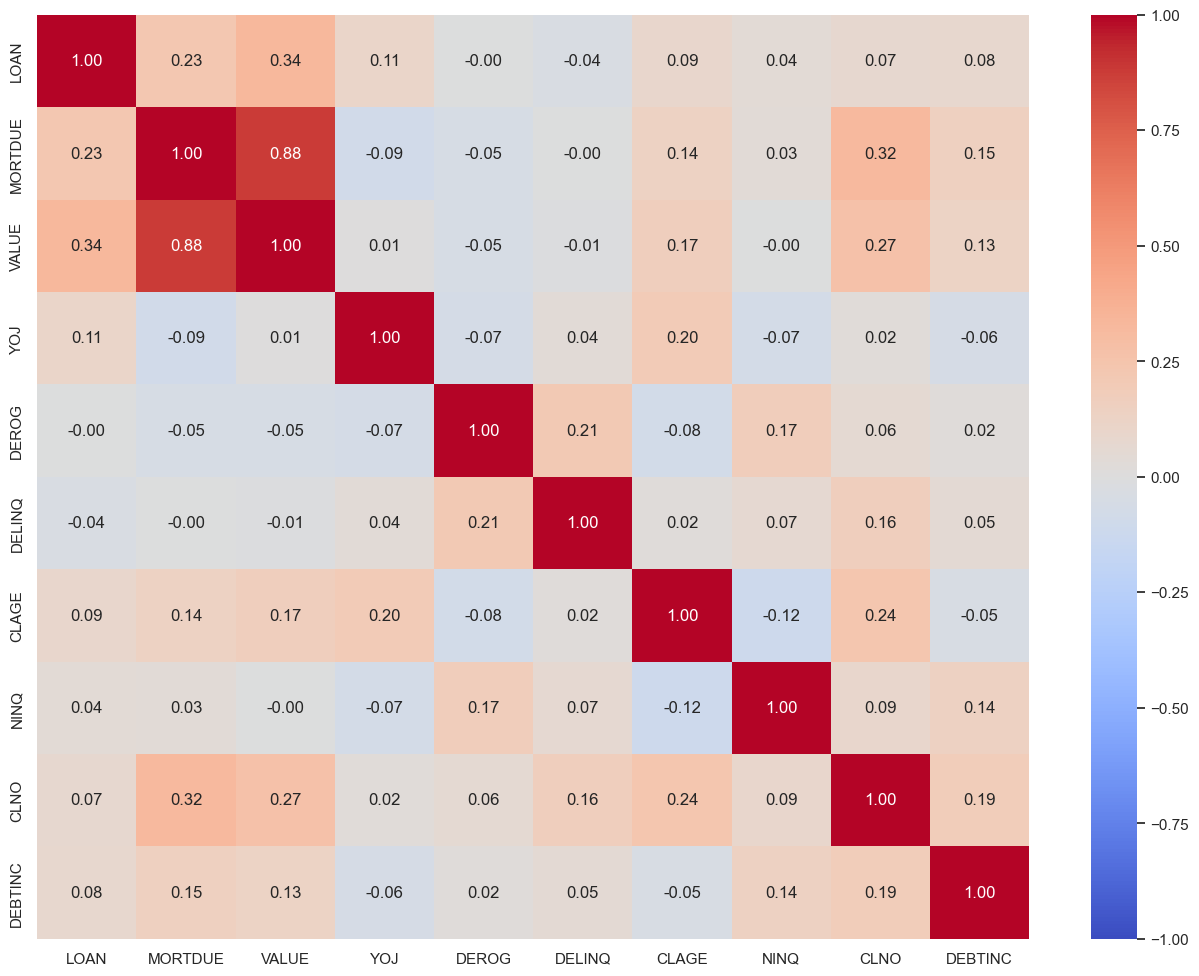

In [36]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data[numerical_col].corr()

# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,annot = True,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

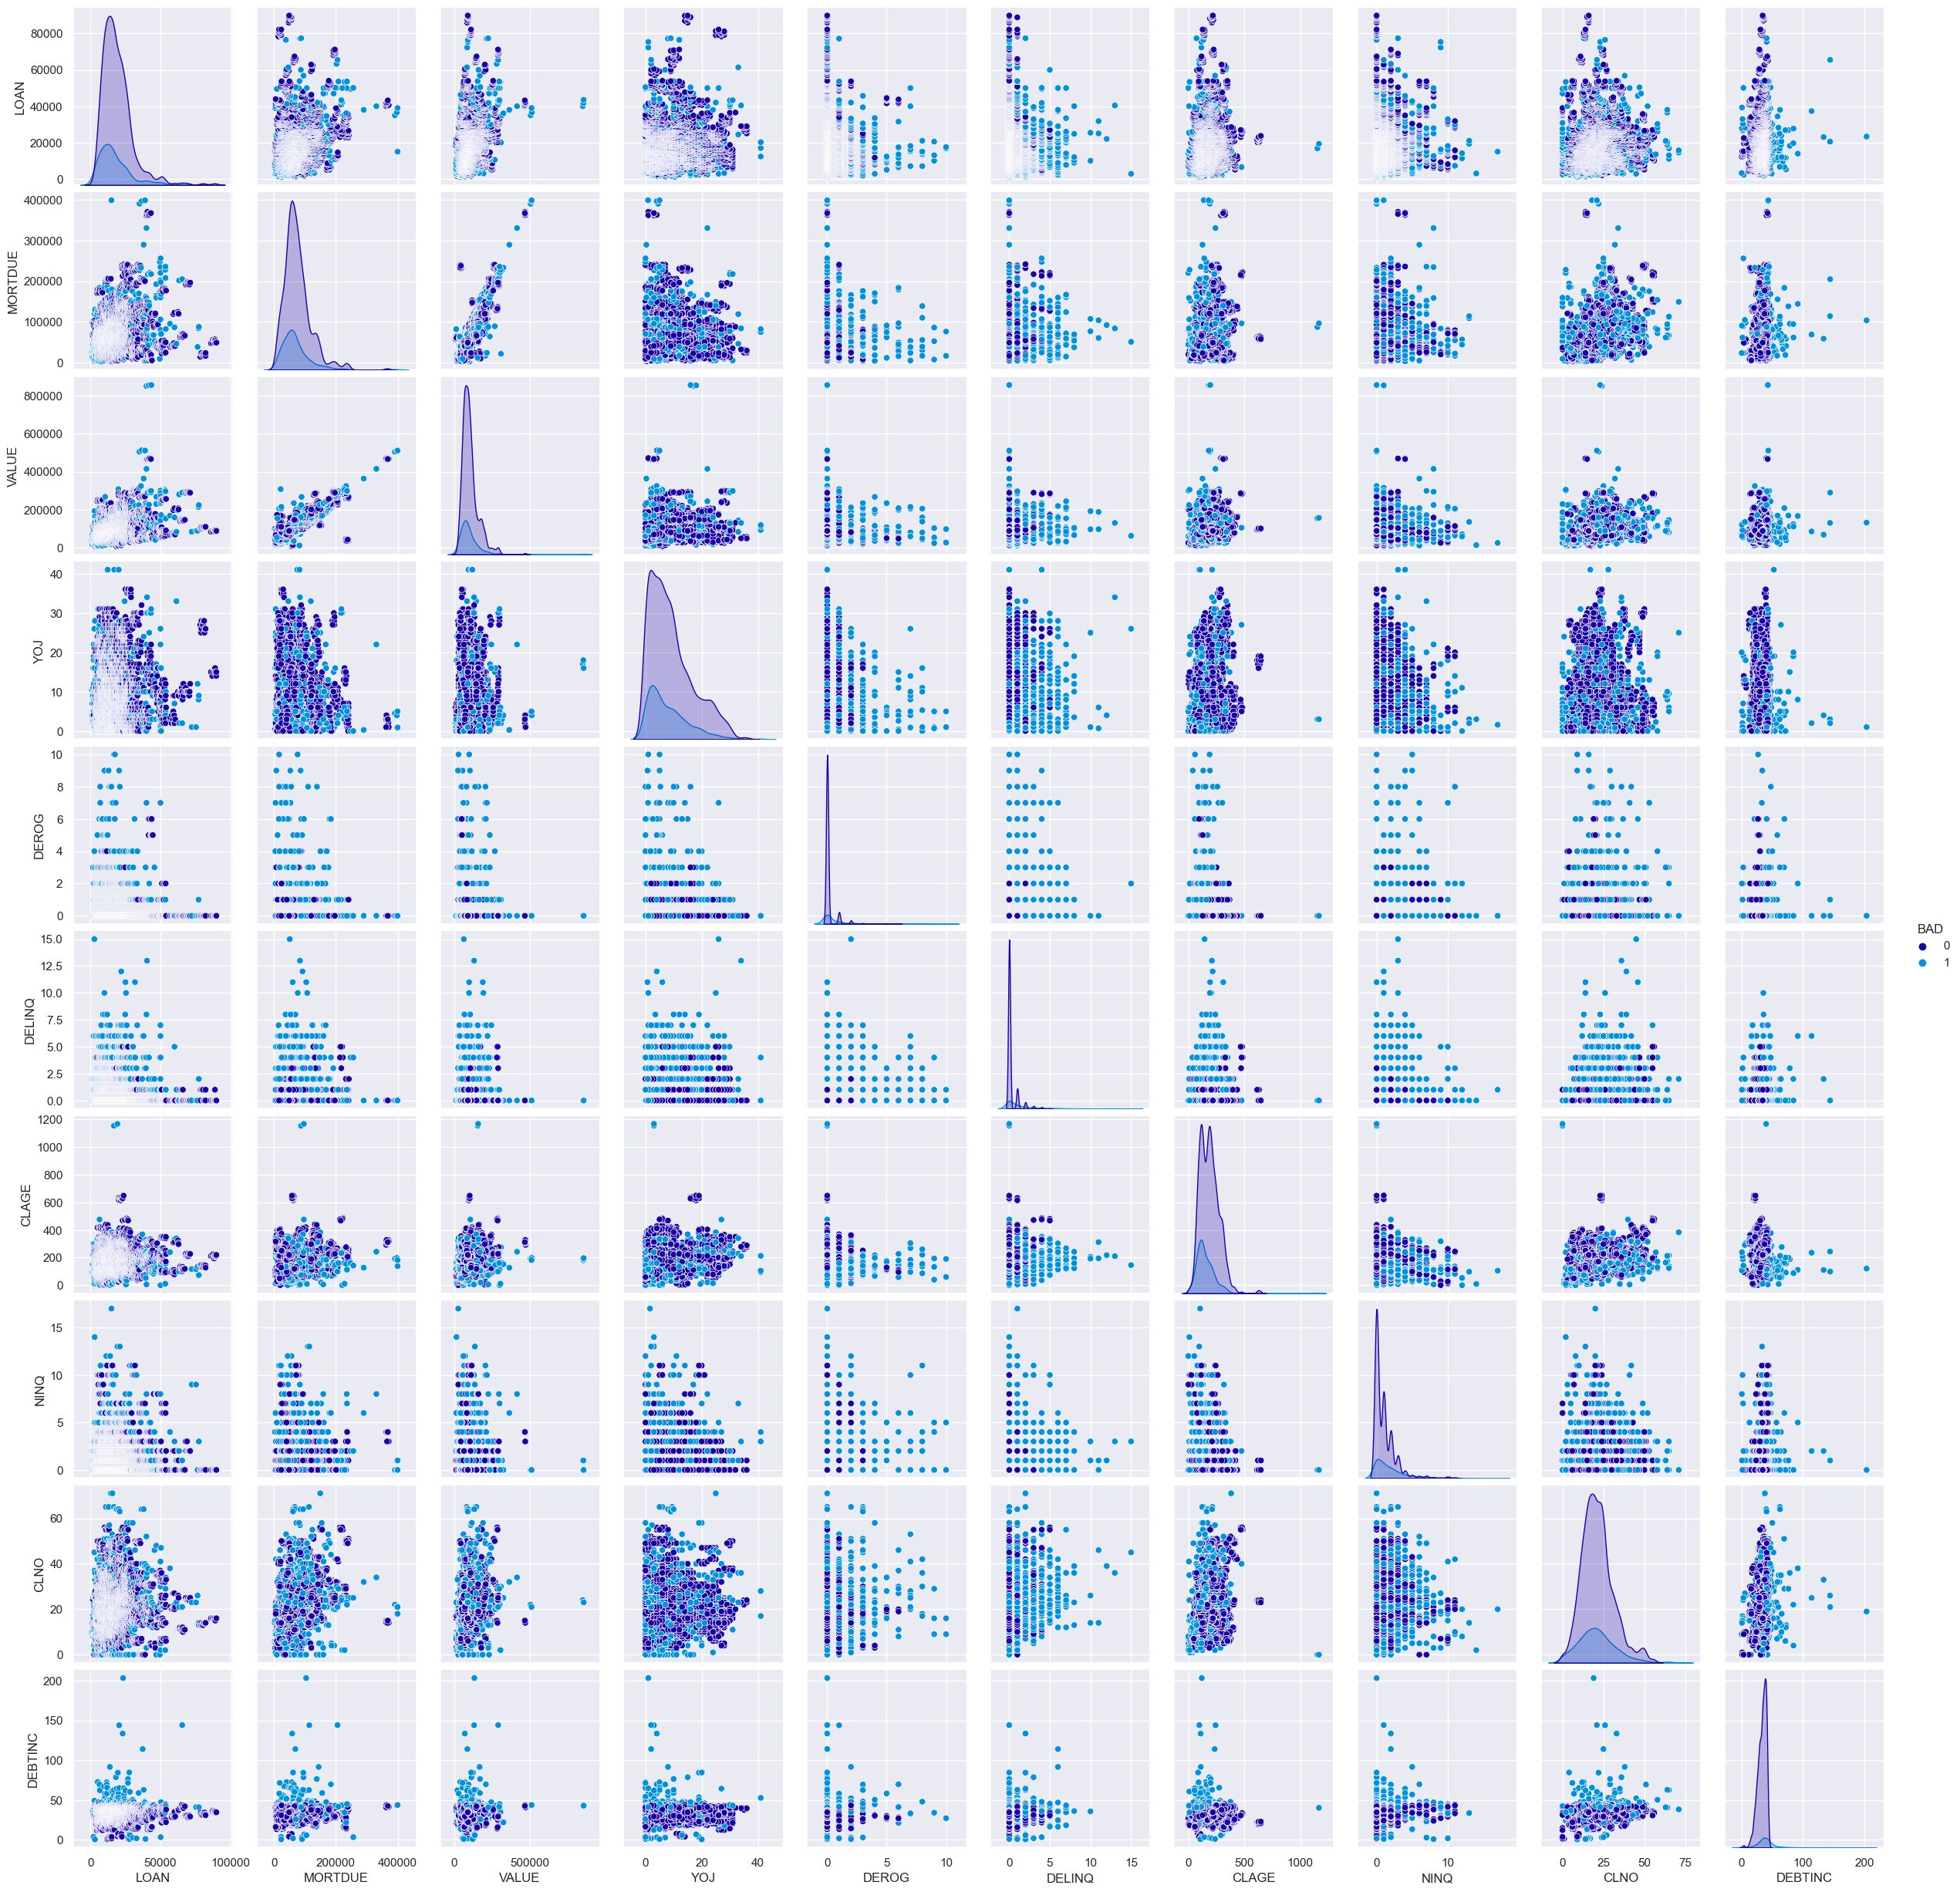

In [37]:
# Build pairplot for the data with hue = 'BAD'

sns.pairplot(data, hue='BAD')


### 🛠️ Missing Values and Outlier Treatment Process

The pairplot visualization highlights two common data quality issues: **missing values** and **outliers**. Both must be addressed carefully before modeling, as they can significantly affect performance and reliability.

#### 🔎 Outlier Treatment

There are multiple strategies for handling outliers, and the right approach depends on the dataset and analysis goals:

- **Filter them out**: Apply lower and upper bounds based on the **interquartile range (IQR)** — i.e., values outside the whiskers in a boxplot.
- **Winsorization**: Replace extreme values with the nearest value within a defined percentile (e.g., 5th and 95th percentiles), reducing the influence of spurious outliers.
- **Transformations**: Apply log, square root, or Box-Cox transformations to reduce skewness caused by outliers.
- **Capping/Flooring**: Manually set upper or lower thresholds for selected features.
- **Keep mild outliers**: If supported by the context or if outliers represent rare but real scenarios, retaining them might be justified.

> 💡 **When to treat outliers?**
Treat outliers when they distort summary statistics, affect model accuracy, or result from data entry errors. If the outliers reflect genuine rare cases (e.g., high-value homes), they should be carefully analyzed or preserved.

#### 🧩 Missing Value Treatment

For handling missing values, a function can be created to apply common imputation techniques:

- **Numerical columns**: Fill missing values using **mean** or **median**, depending on whether the distribution is symmetric or skewed.
- **Categorical columns**: Use **mode imputation**, or introduce a new category such as `"Unknown"`.
- **Advanced options**: Use **KNN imputation**, **regression-based imputation**, or **multiple imputation** when data patterns are complex.

In this case study, we'll begin by using **mean/median imputation** for numerical fields and **mode** for categorical fields. Outliers will be filtered using the **IQR method**, focusing on values beyond the lower and upper whiskers of the distribution.




#### Treating Outliers




In [38]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1= data[col].quantile(0.25) # 25th quantile
    Q3= data[col].quantile(0.75) # 75th quantile
    IQR= Q3-Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR   #define lower whisker
    Upper_Whisker = Q3 + 1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [39]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)


#### Adding new columns in the dataset for each column which has missing values¶




In [40]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [41]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)


#### Filling missing values in numerical columns with median and mode in categorical variables¶




In [42]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object') #

# Fill numeric columns with median.

df[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.

for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)


**Model Building - Approach**
------------------------------

1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set





**Data Preparation**
---------------------





Treating Outliers and Missing Values
=====================================

* We found in the EDA that there are many outliers and missing data. These findings can significantly affect the results of the models.
* Before we put the models into practice, we will deal with the outliers and missing data.


**Outlier**


* For this case etudie we gonna try to set-up a filter on the lowerand upper whisker.


**Missing value**


* There many way to deal with the missing value. some methode can not be fit in some type of data. That's after noticing in the EDA all the numeric data are skewed to the right or left we imput them with the median because the mean as a measure is greatly affected by outliers or if the distribution of the data or column is not normally-distributed.





### **Separating the target variable from other variables**




In [43]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
# Separating the target variable and other variables

X = df.drop(columns = 'BAD', axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function

X = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)

Y = df['BAD']

### **Splitting the data into 70% train and 30% test set**


In [44]:
# Split the data into training and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.70, random_state = 1)
print(X_train.shape, X_test.shape)

(4172, 27) (1788, 27)



## 🧪 Model Evaluation Criterion
---

### 🔍 Two Types of Classification Errors:

1. **False Positive (Type I Error)**  
   Predicting that a customer **will default**, but they actually **repay** the loan.

2. **False Negative (Type II Error)**  
   Predicting that a customer **will repay**, but they actually **default** on the loan.

---

### ❗ Which Loss is More Critical?

- **False Negatives are more costly** for the bank.  
  When the model fails to identify a defaulter and mistakenly classifies them as low-risk, it leads to **loan disbursement to high-risk clients** who are unlikely to repay.
  
- This results in **direct financial loss**, increased **non-performing assets (NPAs)**, and reduced **profitability**.

---

### ✅ How to Minimize False Negatives?

To reduce the risk of issuing loans to potential defaulters, the focus should be on:

- **Maximizing Recall**  
  Recall is defined as:

  \[
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}
  \]

- A **higher recall** means fewer false negatives — the model correctly identifies a greater proportion of actual defaulters.

- In other words, the model should prioritize **catching all the true defaulters**, even if it means occasionally rejecting a credit-worthy customer.

> 💡 **Goal**: Build a model that **maximizes recall**, while maintaining acceptable precision, to help the bank minimize losses from bad loans.



In [45]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


### **Build a Logistic Regression Model**




In [46]:
# Defining the Logistic regression model

log = LogisticRegression(solver='newton-cg')

# Fitting the model on the training data 


log.fit(X_train,Y_train)

LogisticRegression(solver='newton-cg')


#### Checking the performance on the train dataset




              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3355
           1       0.72      0.58      0.64       817

    accuracy                           0.87      4172
   macro avg       0.81      0.76      0.78      4172
weighted avg       0.87      0.87      0.87      4172



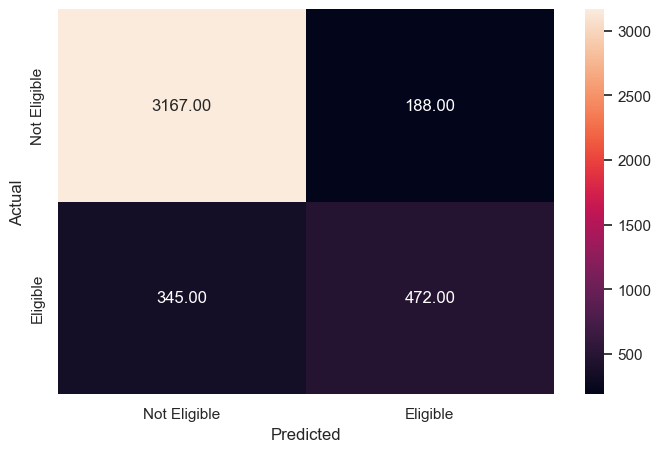

In [47]:
#Predict for train set

Y_pred_train = log.predict(X_train)


#checking the performance on the train dataset

metrics_score(Y_train, Y_pred_train)


#### Checking the performance on the test dataset




              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1416
           1       0.78      0.56      0.65       372

    accuracy                           0.88      1788
   macro avg       0.84      0.76      0.79      1788
weighted avg       0.87      0.88      0.87      1788



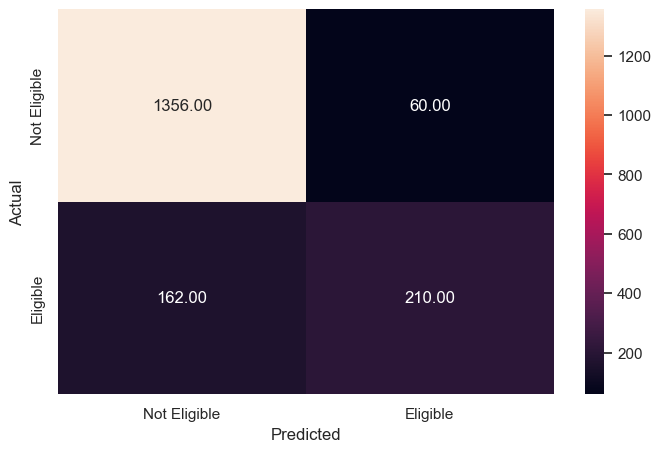

In [48]:
#Predict for test set

Y_pred_test = log.predict(X_test)

#checking the performance on the test dataset

metrics_score(Y_test, Y_pred_test)


**Observations: ****\_\_******

## 📊 Model Performance Evaluation: Observations from Confusion Matrices

### 🔍 Key Observations

- The classification model performs **very well on class 0** (non-defaulters or "Not Eligible"):
  - In both train and test sets, **precision and recall for class 0 are above 0.90**, indicating that the model is accurately identifying most non-defaulters.
  - This is evident in the large number of true negatives in the confusion matrix (e.g., 3167 in train, 1356 in test).

- However, the model performs **poorly on class 1** (defaulters or "Eligible"):
  - **Recall for class 1 is low**: only **0.58** on training data and **0.56** on test data.
  - **Precision is slightly better** (0.72 and 0.78, respectively), meaning that when it does predict class 1, it is reasonably confident.
  - But the model **misses many true defaulters** (345 in training, 162 in test), which is problematic for the business use case.

### ⚠️ Implications

- The **model favors the majority class (class 0)** due to imbalance in the dataset (e.g., 3355 vs 817).
- The **low recall for class 1** means many high-risk clients may be misclassified as low-risk — a costly error for the bank.

---

### ✅ Recommendation

To improve recall for class 1 (defaulters):

- **Use class weighting** (e.g., `class_weight='balanced'`) in logistic regression or tree-based models.
- Apply **resampling techniques** like SMOTE (oversampling minority class) or undersampling class 0.
- Tune the **decision threshold** to favor recall over precision.
- Consider more complex models like **Random Forest**, **XGBoost**, or **Gradient Boosting** with fine-tuned hyperparameters.

> The goal is to **reduce false negatives** while maintaining acceptable overall performance.



#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval




In [49]:
# Printing the coefficients of logistic regression

cols = X.columns

coef_lg = log.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

0
VALUE_missing_values_flag    3.095345e+00
DEBTINC_missing_values_flag  2.668723e+00
CLNO_missing_values_flag     1.074597e+00
CLAGE_missing_values_flag    1.073413e+00
JOB_Sales                    7.875590e-01
REASON_missing_values_flag   2.200907e-01
NINQ                         1.900055e-01
REASON_HomeImp               1.612782e-01
DEBTINC                      8.811080e-02
JOB_Self                     8.235236e-02
MORTDUE_missing_values_flag  1.282529e-02
NINQ_missing_values_flag     8.826399e-03
CLNO                         1.828223e-03
DELINQ                       0.000000e+00
DEROG                        0.000000e+00
MORTDUE                     -7.672718e-07
VALUE                       -1.838960e-06
LOAN                        -6.618073e-06
CLAGE                       -5.983494e-03
YOJ                         -1.216066e-02
JOB_Other                   -2.474662e-01
JOB_ProfExe                 -4.617164e-01
YOJ_missing_values_flag     -6.110894e-01
DELINQ_missing_values_flag  -6.376592e-01
JOB_Office                  -6.659998e-01
DEROG_missing_values_flag   -1.090822e+00
JOB_missing_values_flag     -1.443656e+00


**Insights ***\_\_*****


* VALUE\_missing\_values\_flag is the modet important varable in predicting loan default, that's mean the customers ho apply for loan and are not showing there past loan accurately, are having a less chance to be approvedfor a loan.


* The variables DEBTINC\_missing\_values\_flag, CLAGE\_missing\_values\_flag, CLNO\_missing\_values\_flag play a mojor role in the default loan prediction.







* As we notice the variable BAD is unbalance, we try different threshold. Optimal threshold can be find by using the Precision-Recall Curve.





**The Precision-Recall Curve for Logistic Regression**




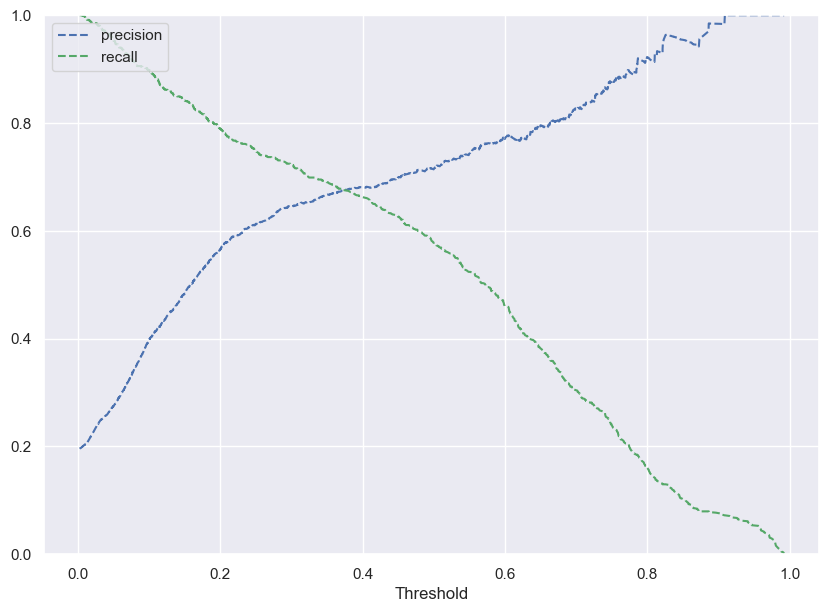

In [50]:
# predict_proba gives the probability of each observation belonging to each class
Y_scores_log = log.predict_proba(X_train) 


precisions_log, recalls_log, thresholds_log = precision_recall_curve(Y_train, Y_scores_log[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_log, precisions_log[:-1], 'b--', label = 'precision')

plt.plot(thresholds_log, recalls_log[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()


##### **Observation:**

* The plot illustrates the tradeoff between precision and recall as the classification threshold varies from 0 to 1. As expected:

Precision increases with higher thresholds, indicating fewer false positives.

Recall decreases with higher thresholds, indicating more false negatives.

The curves intersect around threshold ≈ 0.35, where precision and recall are approximately balanced (both close to ~0.67). This balance suggests that 0.35 may represent an optimal decision threshold if equal importance is placed on precision and recall.

📌 **Conclusion:** A threshold of ~0.35 achieves a balanced tradeoff between precision and recall and may be ideal when you want to optimize for both metrics equally (e.g., in early-stage filtering or moderate-risk applications).


**Let's find out the performance of the model at this threshold.**




              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3355
           1       0.72      0.58      0.64       817

    accuracy                           0.87      4172
   macro avg       0.81      0.76      0.78      4172
weighted avg       0.87      0.87      0.87      4172



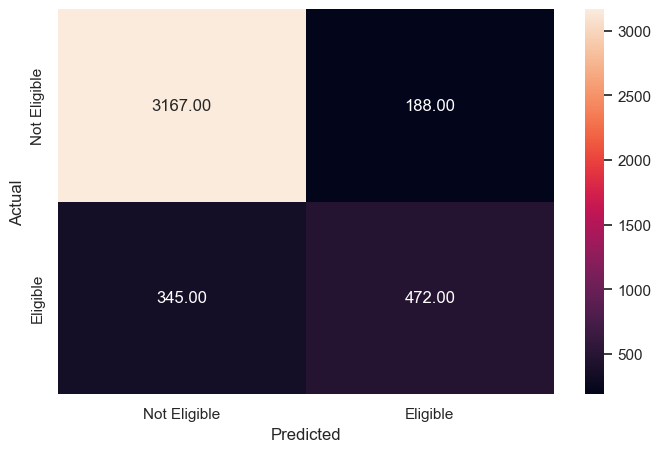

In [51]:
optimal_threshold1 = 0.35

y_pred_train = log.predict_proba(X_train)

metrics_score(Y_train, Y_pred_train > optimal_threshold1)


**Observations:**


* The model achieves a strong overall accuracy (87%), but at the cost of recall for the minority class (Eligible). If the goal is to avoid rejecting truly eligible individuals, recall should be improved — possibly by lowering the threshold or using class balancing techniques.

* **Strategic Use:** This threshold (0.35) is useful if false approvals are more critical than missed approvals (e.g., for loan screening or eligibility checks with strict criteria). However, for inclusion-sensitive tasks, this threshold might need to be revised to capture more true positives.




              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1416
           1       0.78      0.56      0.65       372

    accuracy                           0.88      1788
   macro avg       0.84      0.76      0.79      1788
weighted avg       0.87      0.88      0.87      1788



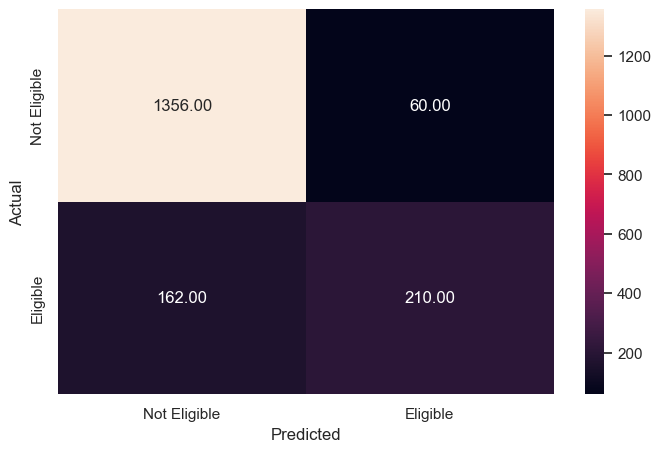

In [52]:
optimal_threshold1 = .35

y_pred_test = log.predict_proba(X_test)

metrics_score(Y_test, Y_pred_test > optimal_threshold1)

## *Observation:*

* The performance on the test data still the same as in the initial logistic regression model.

The model shows high precision and accuracy, especially for identifying not eligible individuals. However, the recall for eligible class remains modest (56%), which means it may fail to approve nearly half of the eligible candidates.

**The optimal threshold has no effect on the performance on the model.**





### **Build a Logistic Regression Model with class weight**




In [53]:
# Logistic model with class weights class_weight={0: 0.2, 1: 0.8}
log_weight = LogisticRegression(solver='newton-cg', class_weight={0: 0.2, 1: 0.8}, random_state=1)

# Fitting the model on the training data 


log_weight.fit(X_train,Y_train)

LogisticRegression(class_weight={0: 0.2, 1: 0.8}, random_state=1,
                   solver='newton-cg')


#### Checking the performance on the train dataset




              precision    recall  f1-score   support

           0       0.94      0.86      0.90      3355
           1       0.58      0.77      0.66       817

    accuracy                           0.85      4172
   macro avg       0.76      0.82      0.78      4172
weighted avg       0.87      0.85      0.85      4172



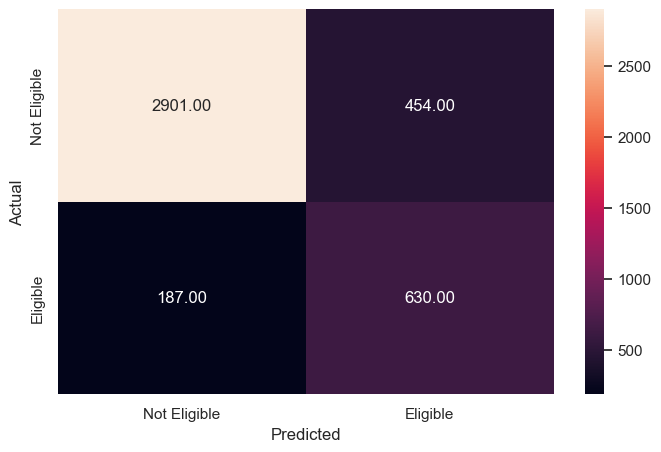

In [54]:
#Predict for train set

Y_pred_train = log_weight.predict(X_train)


#checking the performance on the train dataset

metrics_score(Y_train, Y_pred_train)


#### Checking the performance on the test dataset




              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1416
           1       0.61      0.74      0.67       372

    accuracy                           0.85      1788
   macro avg       0.77      0.81      0.79      1788
weighted avg       0.86      0.85      0.85      1788



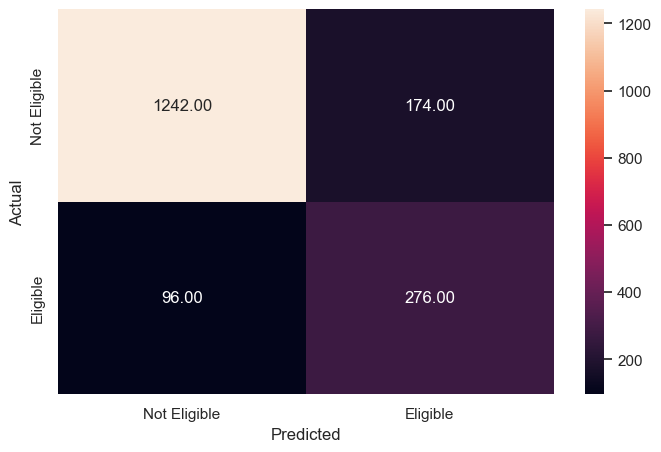

In [55]:
#Predict for test set


Y_pred_test = log_weight.predict(X_test)

#checking the performance on the test dataset

metrics_score(Y_test, Y_pred_test)


**Insights**


By using class weights, the model achieved a strong improvement in recall for the minority class (Eligible), without a major compromise in overall accuracy or performance on the majority class.

**Strategic Tradeoff:** This model is more suitable when capturing as many eligible individuals as possible is a priority, even if a few ineligible ones are mistakenly approved. It's especially useful in inclusion-first or screening-oriented applications.





### **Build a Decision Tree Model**




* In the case of logistic regression, I addressed outliers before training the model to ensure robustness. However, for the Decision Tree model, applying similar outlier treatment is not recommended, as it may lead to overfitting — especially when generating values based on limited or sparse information.




In [56]:
# load data
a=pd.read_csv("hmeq.csv")
# Copying data to another variable to avoid any changes to original data
data=a.copy()

In [57]:
# select object column type
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

# Changing the data type of object type column to category. hint use astype() function

for i in cols:
    data[i] = data[i].astype('category')


#### Data Preparation for the tree based model




In [58]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(data,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    data[new_col] = data[col].isna()
    return data

In [59]:
# Add binary flags
# list of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)

In [60]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data =  data.select_dtypes('category').columns.tolist()# df.select_dtypes('object') 

# Fill numeric columns with median.

data[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.

for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)


#### Separating the target variable y and independent variable x




In [61]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix

# Separating the target variable and other variables
X = data.drop(columns = 'BAD', axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function

X = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)

Y = data['BAD']


#### Split the data¶




In [62]:
# Split the data into training and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.70, random_state = 1)
print(X_train.shape, X_test.shape)

(4172, 27) (1788, 27)


In [63]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}

dt = DecisionTreeClassifier(criterion= 'gini',class_weight = {0: 0.2, 1: 0.80}, random_state = 1)

In [64]:
#fitting Decision tree model

dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)


#### Checking the performance on the train dataset




In [65]:
# Checking performance on the training data

Y_train_pred_dt = dt.predict(X_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



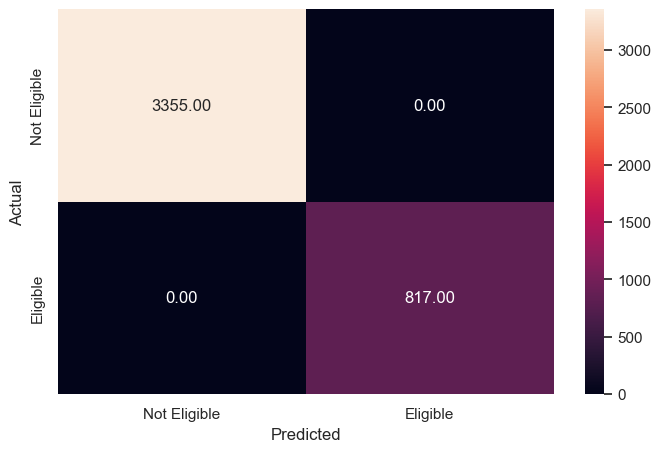

In [66]:
# Checking performance on the training data

Y_train_pred_dt = dt.predict(X_train)

metrics_score(Y_train, Y_train_pred_dt)


#### Checking the performance on the test dataset¶




              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1416
           1       0.71      0.63      0.67       372

    accuracy                           0.87      1788
   macro avg       0.81      0.78      0.79      1788
weighted avg       0.86      0.87      0.87      1788



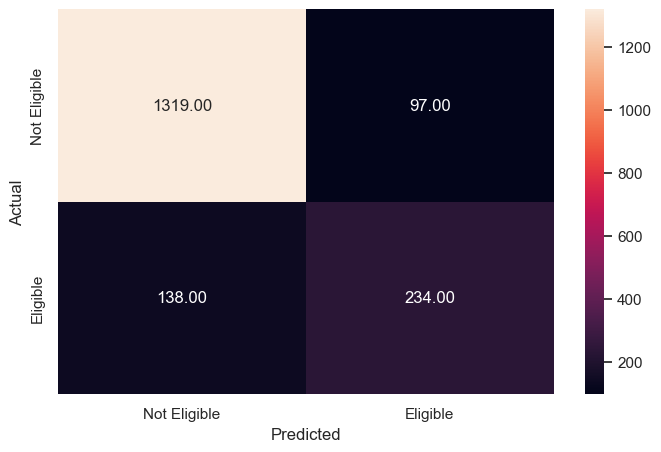

In [67]:
# Checking performance on the testing data

Y_test_pred_dt = dt.predict(X_test)

metrics_score(Y_test, Y_test_pred_dt)


**Insights**

* The Decision Tree model shows strong performance on the test set, achieving an overall accuracy of 87%, which is consistent with prior models.

* For the **Eligible class (Class 1):**

     - Recall is 63%, meaning the model correctly identified 234 out of 372 eligible individuals.

     - Precision is 71%, indicating that 71% of predicted eligible cases were truly eligible.

     - This reflects a reasonable balance between sensitivity and specificity for the minority class.

* For the Not Eligible class (Class 0):

     - High precision (0.91) and recall (0.93) confirm the model's strength in identifying the majority class accurately.

* Although Decision Trees are prone to overfitting, this model does not show clear signs of overfitting on the test data, as performance remains stable and balanced across both classes.


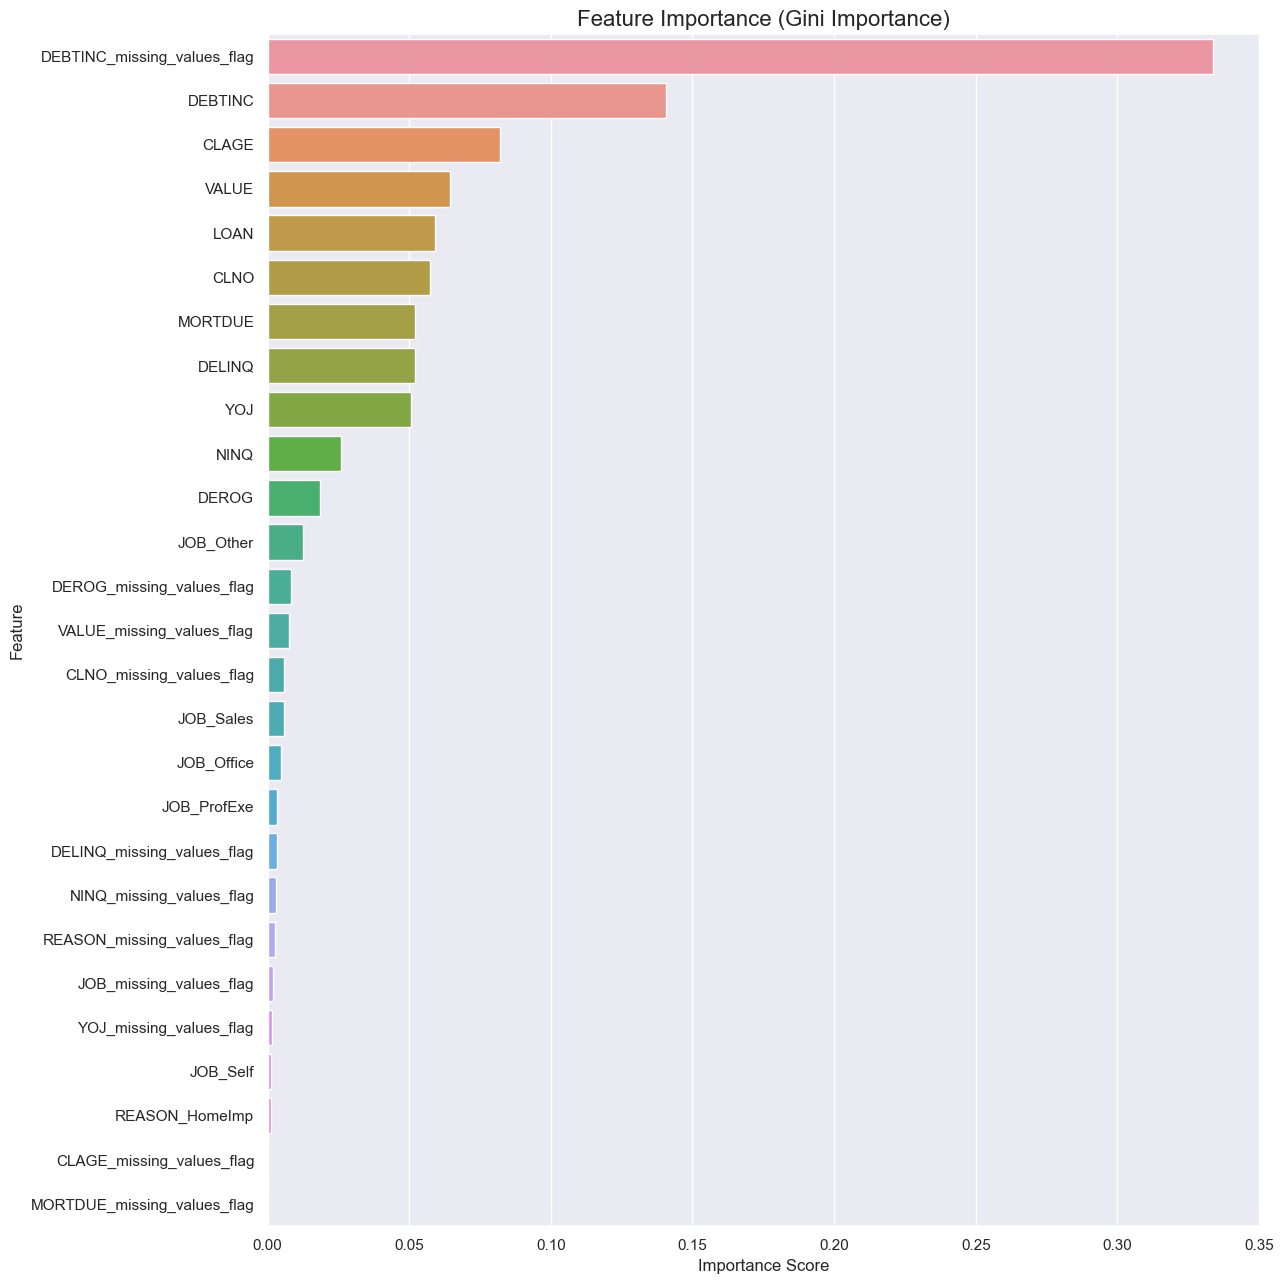

In [68]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))

sns.barplot(x='Importance', y=importance_df.index, data=importance_df)

plt.title('Feature Importance (Gini Importance)', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



### 🔍 Feature Importance Reflection – What We've Learned So Far

The analysis of feature importances from our tree-based models reveals that the model’s decisions are strongly driven by **financial variables**, especially the **Debt-to-Income ratio** (DEBTINC) and its missing value indicator. Specifically:

   - DEBTINC_missing_values_flag is the most influential feature. This implies that the absence of information regarding debt-to-income ratio is itself a strong predictor of loan eligibility.

   - DEBTINC, ranked second, confirms that the actual debt-to-income value is equally critical.

   - Other high-ranking features include:

        - CLAGE: Age of the oldest credit line

        - VALUE, LOAN, CLNO, MORTDUE, and DELINQ: All financially relevant features, reinforcing the model’s sensitivity to              credit behavior and asset values.

   - Less impactful are various job categories, reason for the loan, and most missing value flags, suggesting that not all categorical or missing indicators hold strong predictive value.

### 👉 Conclusion:###  
The model’s interpretability shows that focusing on **financial health metrics** and **careful handling of missing values** is key to accurate prediction. Now that we understand how the model splits data, we can improve performance by **tuning the tree’s structure**.






### **Decision Tree - Hyperparameter Tuning**


**🎯 Why Hyperparameter Tuning?**

Decision Trees are highly sensitive to their hyperparameters. Without tuning, trees may overfit or underfit, depending on their depth, number of samples per split, or how they choose to split features.

To address this, we’ll use **GridSearchCV**, which:

   - Performs e**xhaustive search** over specified hyperparameter combinations.

   - Uses **cross-validation** to find the best model that generalizes well.

   - Helps control complexity (via max_depth, min_samples_leaf, etc.) and decision quality (via criterion).

**🔧 Key Parameters to Tune**

| **Hyperparameter** | **Description**                                                                                |
| ------------------ | ---------------------------------------------------------------------------------------------- |
| `criterion`        | Function to measure split quality: `"gini"` (Gini impurity) or `"entropy"` (information gain). |
| `max_depth`        | Maximum tree depth; limits model complexity.                                                   |
| `min_samples_leaf` | Minimum samples per leaf node; prevents over-fragmentation.                                    |




#### Using GridSearchCV for Hyperparameter tuning on the model




In [83]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.80}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 30), 
              'min_samples_leaf': [1,2,5,7,10],
              'max_leaf_nodes':[2, 3, 4, 10, 15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, n_jobs=-1)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, Y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=10,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)


#### Checking the performance on the train dataset




              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3355
           1       0.59      0.83      0.69       817

    accuracy                           0.85      4172
   macro avg       0.77      0.84      0.80      4172
weighted avg       0.88      0.85      0.86      4172



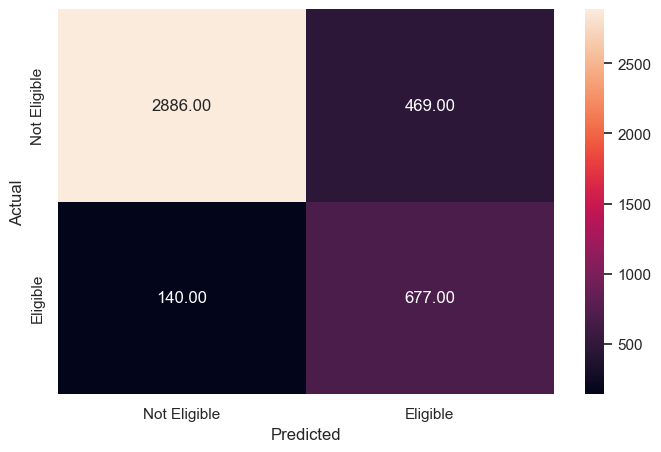

In [84]:
# Checking performance on the training data based on the tuned model

Y_train_pred_dt = dtree_estimator.predict(X_train)

metrics_score(Y_train, Y_train_pred_dt)


#### Checking the performance on the test dataset¶




              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1416
           1       0.59      0.79      0.68       372

    accuracy                           0.84      1788
   macro avg       0.77      0.82      0.79      1788
weighted avg       0.87      0.84      0.85      1788



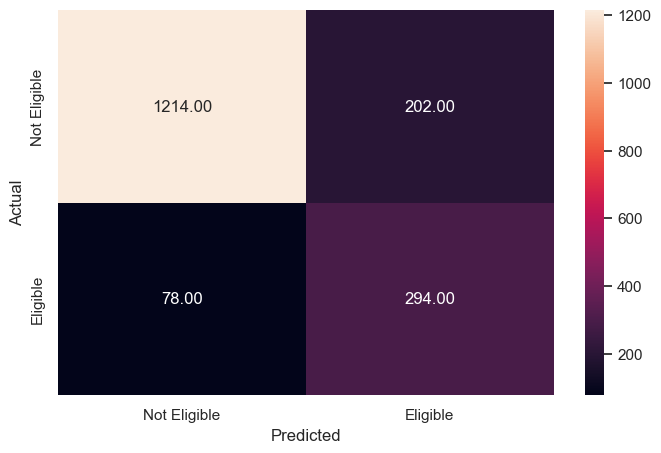

In [85]:
# Checking performance on the testing data based on the tuned model

Y_test_pred_dt = dtree_estimator.predict(X_test)

metrics_score(Y_test, Y_test_pred_dt)


**Insights**

* The tuned Decision Tree model demonstrates strong generalization and is not overfitting, as shown by its consistent performance across training and test datasets. It achieves a recall of **83% on the training data** and **79% on the test data** for the **Eligible class**, indicating that it effectively identifies true positives without significant drop-off. The overall **accuracy remains high** (**85% on train**, **84% on test**), and the **weighted F1-scores** are stable at **0.86 and 0.85**, respectively. Compared to previous models, this tuned version achieves **better recall for the minority class** while maintaining a solid balance between precision and recall, making it a robust and well-optimized model for deployment.


#### Plotting the Decision Tree




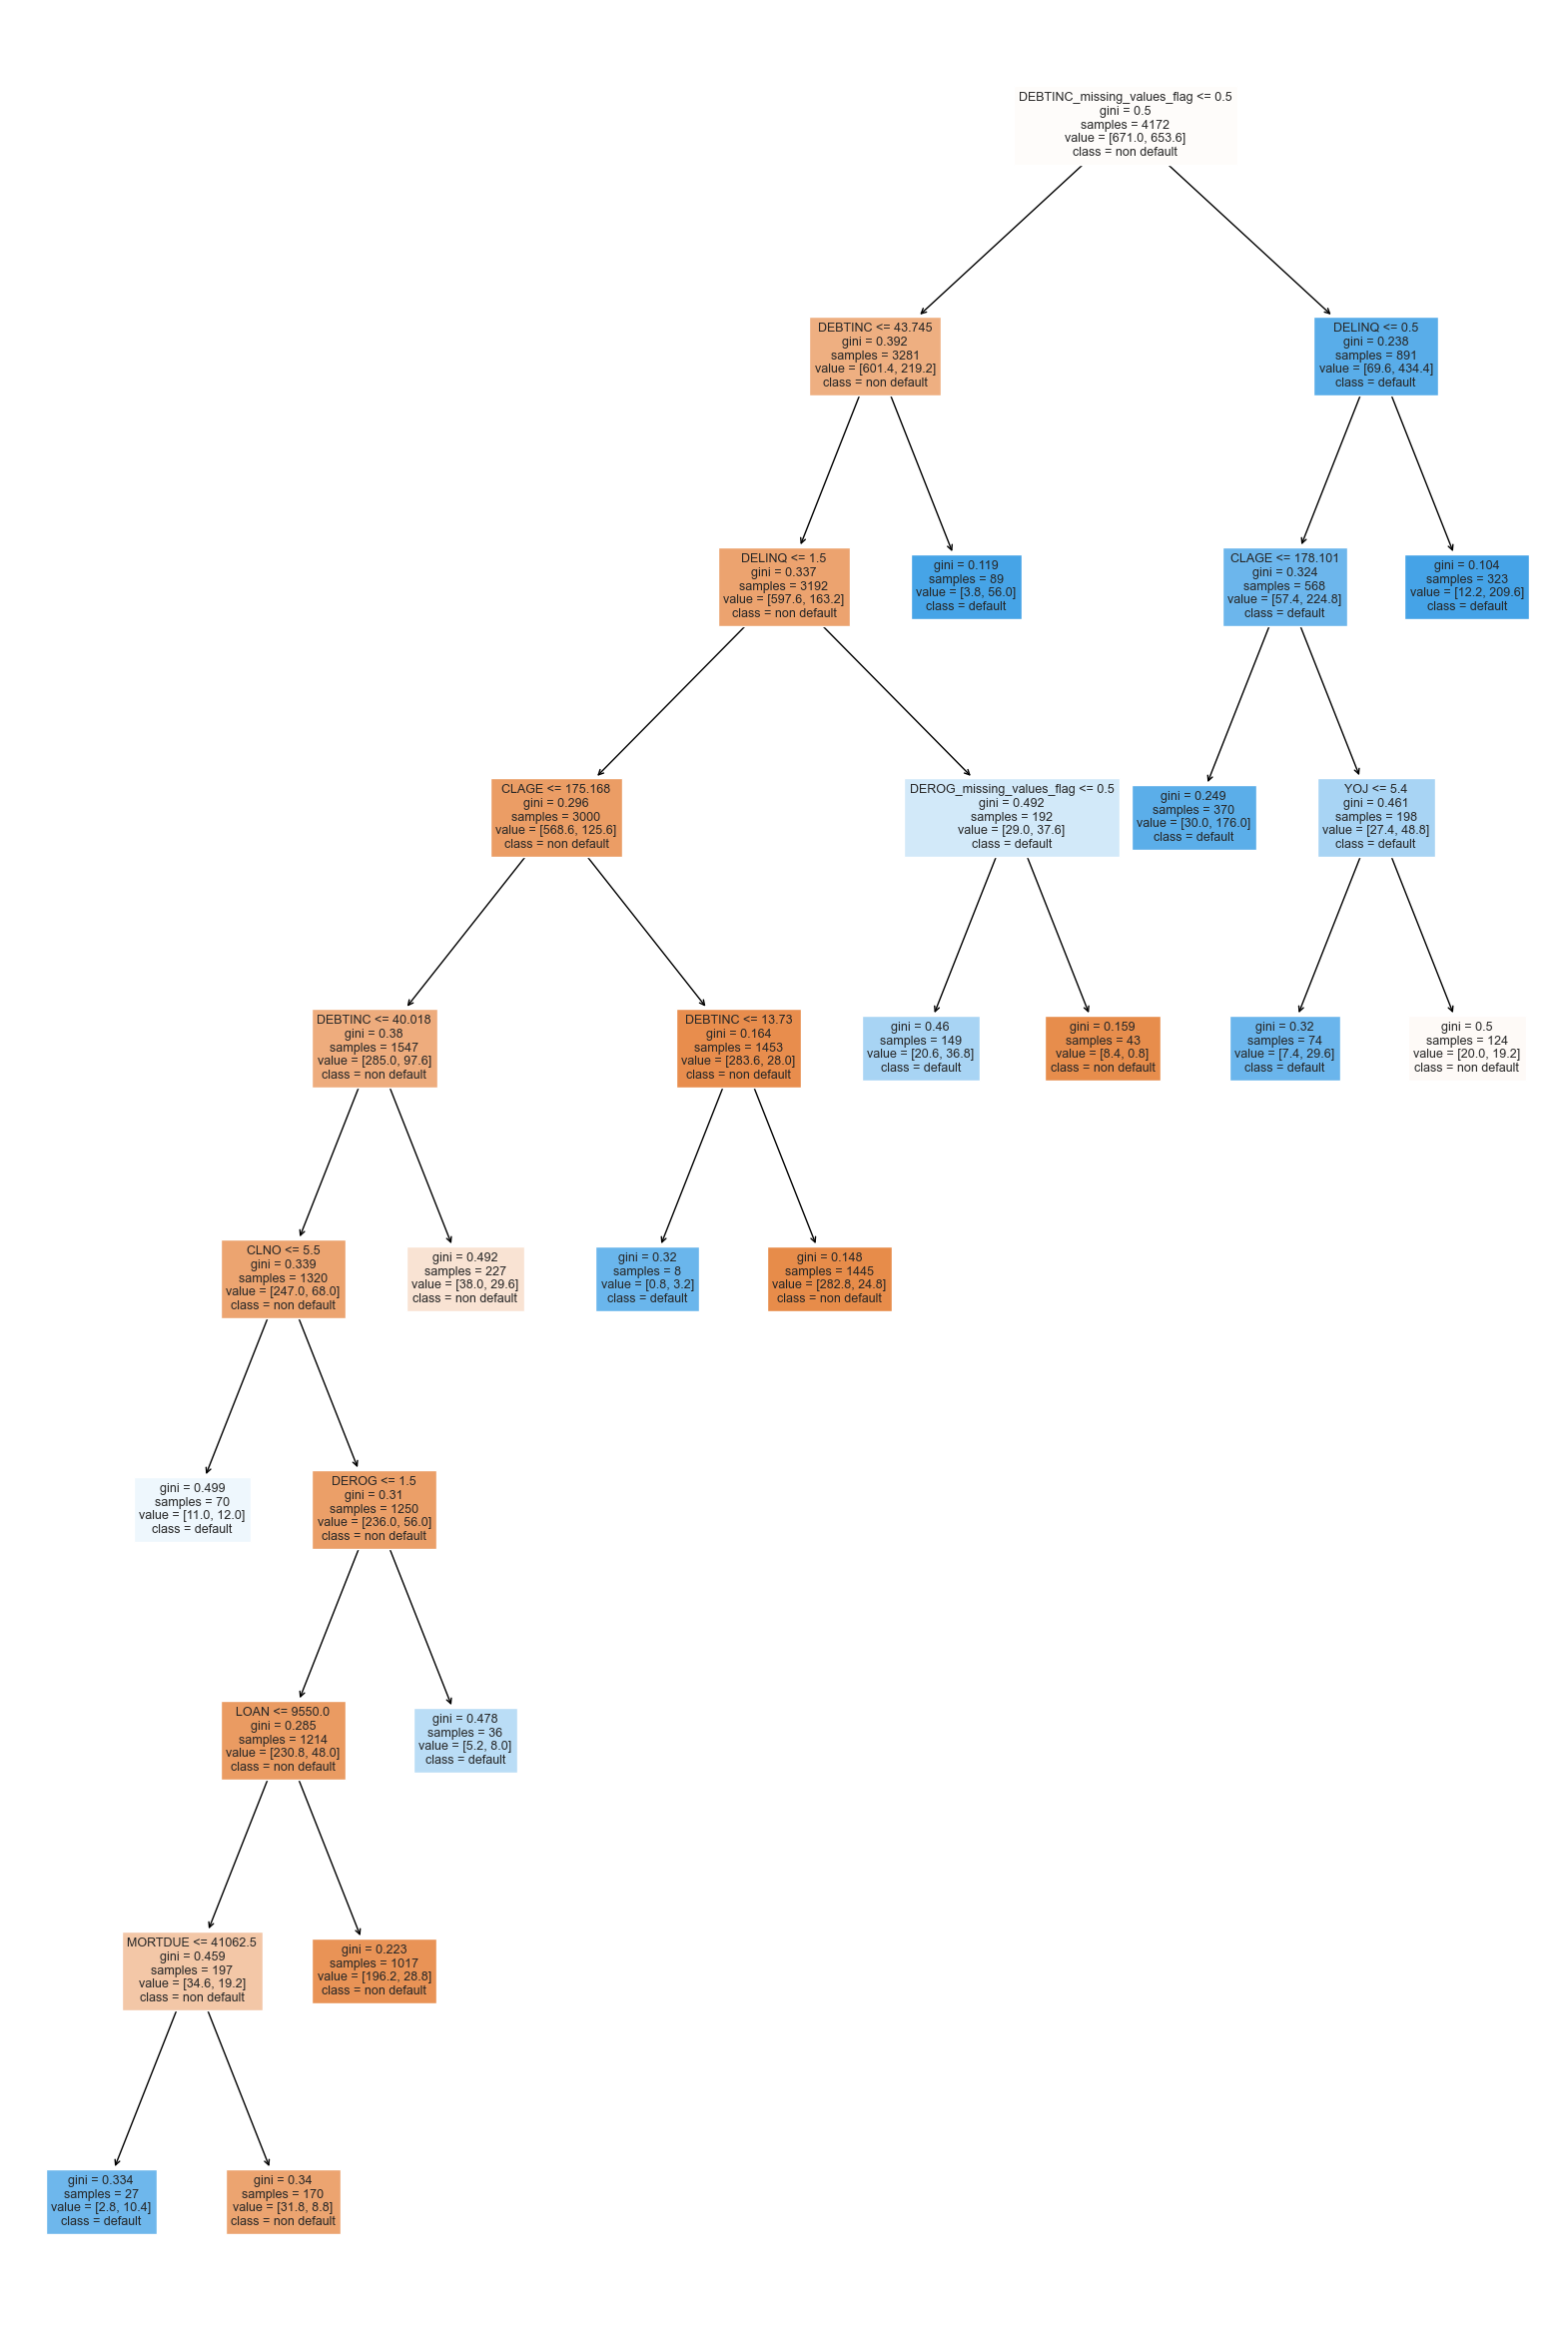

In [86]:
# Plot the decision  tree and analyze it to build the decision rule

# features = list(X.columns)

plt.figure(figsize = (20, 30))

out=tree.plot_tree(dtree_estimator, feature_names = X_train.columns.tolist(), filled = True, fontsize = 9, node_ids = False, class_names = ['non default', 'default' ])
for o in out:
    arrow =o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()


#### Deduce the business rules apparent from the Decision Tree and write them down:

* Rule 1: If Customer's DEBTINC is missing, then those customers will default.


* Rule 1: If Customer's DEBTINC is less then 43.75, the DELINQ is less then 1.5 and the CLAGE is less then 175.17 those customers will default.


* Rule 3: If the Customer's DELINQ is less then 0.5 those customer will not default.







Importance of features in the tree building¶
============================================




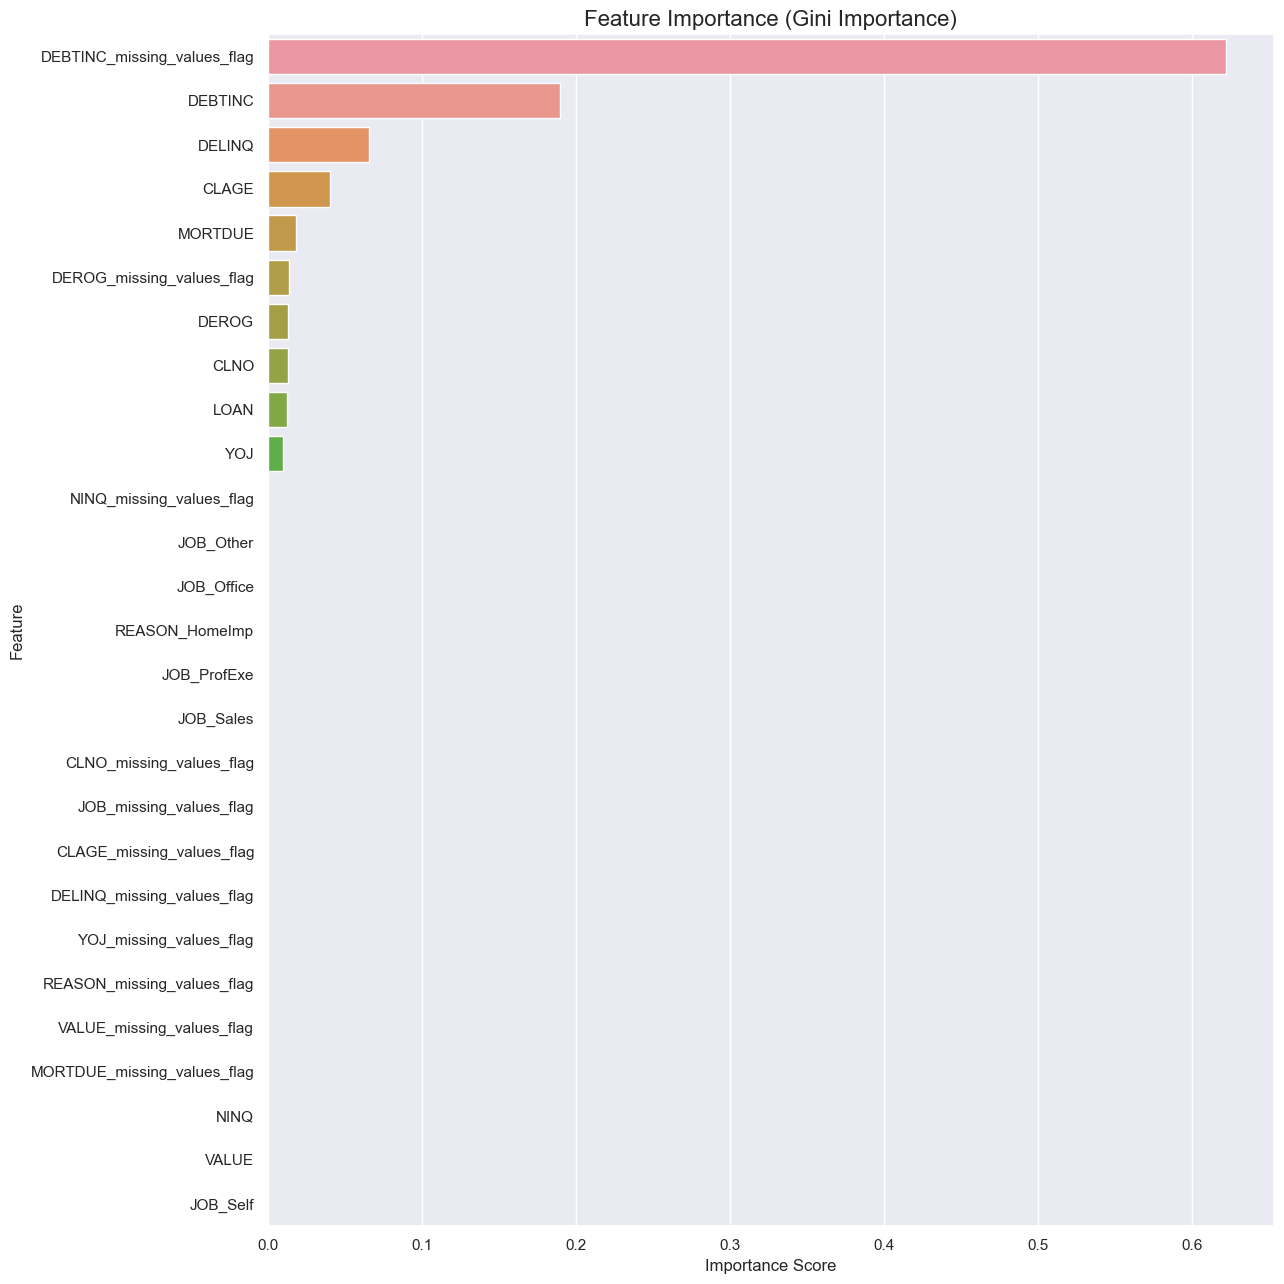

In [87]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset

importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))

sns.barplot(x='Importance', y=importance_df.index, data=importance_df)

plt.title('Feature Importance (Gini Importance)', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



**Building a Random Forest Classifier**
========================================

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.


**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**




In [88]:
# Defining Random forest CLassifier

rf = RandomForestClassifier(random_state = 1)

rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)


#### Checking the performance on the train dataset




              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



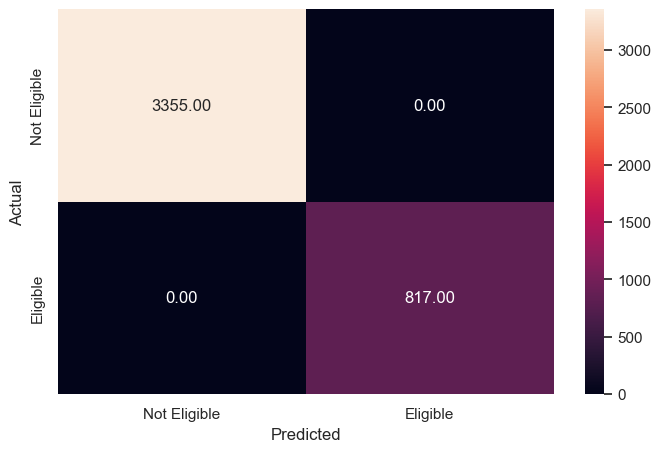

In [89]:
#Checking performance on the training data

Y_pred_train_rf = rf.predict(X_train)

metrics_score(Y_train, Y_pred_train_rf)


#### Checking the performance on the test dataset¶




              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1416
           1       0.86      0.70      0.77       372

    accuracy                           0.91      1788
   macro avg       0.89      0.84      0.86      1788
weighted avg       0.91      0.91      0.91      1788



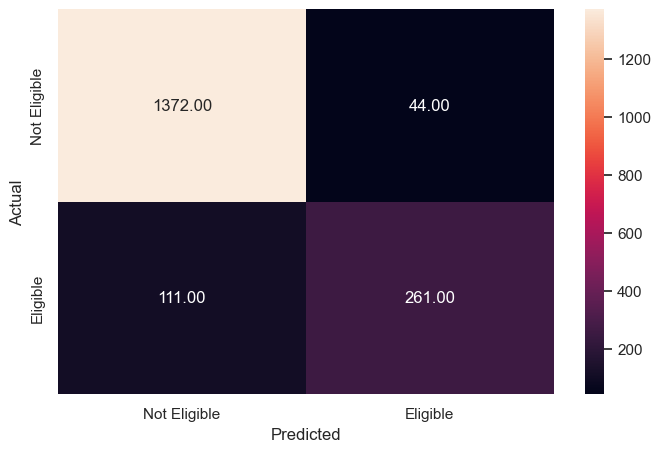

In [90]:
# Checking performance on the test data

Y_pred_test_rf = rf.predict(X_test)

metrics_score(Y_test, Y_pred_test_rf)


**Observations:**


* The Random Forest model achieves perfect performance on the training set with 100% precision, recall, and F1-score for both classes, indicating clear overfitting — the model memorizes the training data completely. On the test set, however, it still performs very well, achieving an overall accuracy of 91%, a recall of 97% for the majority class (Not Eligible), and 70% recall for the minority class (Eligible). This drop in performance on unseen data confirms overfitting, but the test results are still strong, especially compared to previous models. The model remains highly precise (0.86) and fairly balanced in terms of generalization, making it a powerful but potentially high-variance learner.


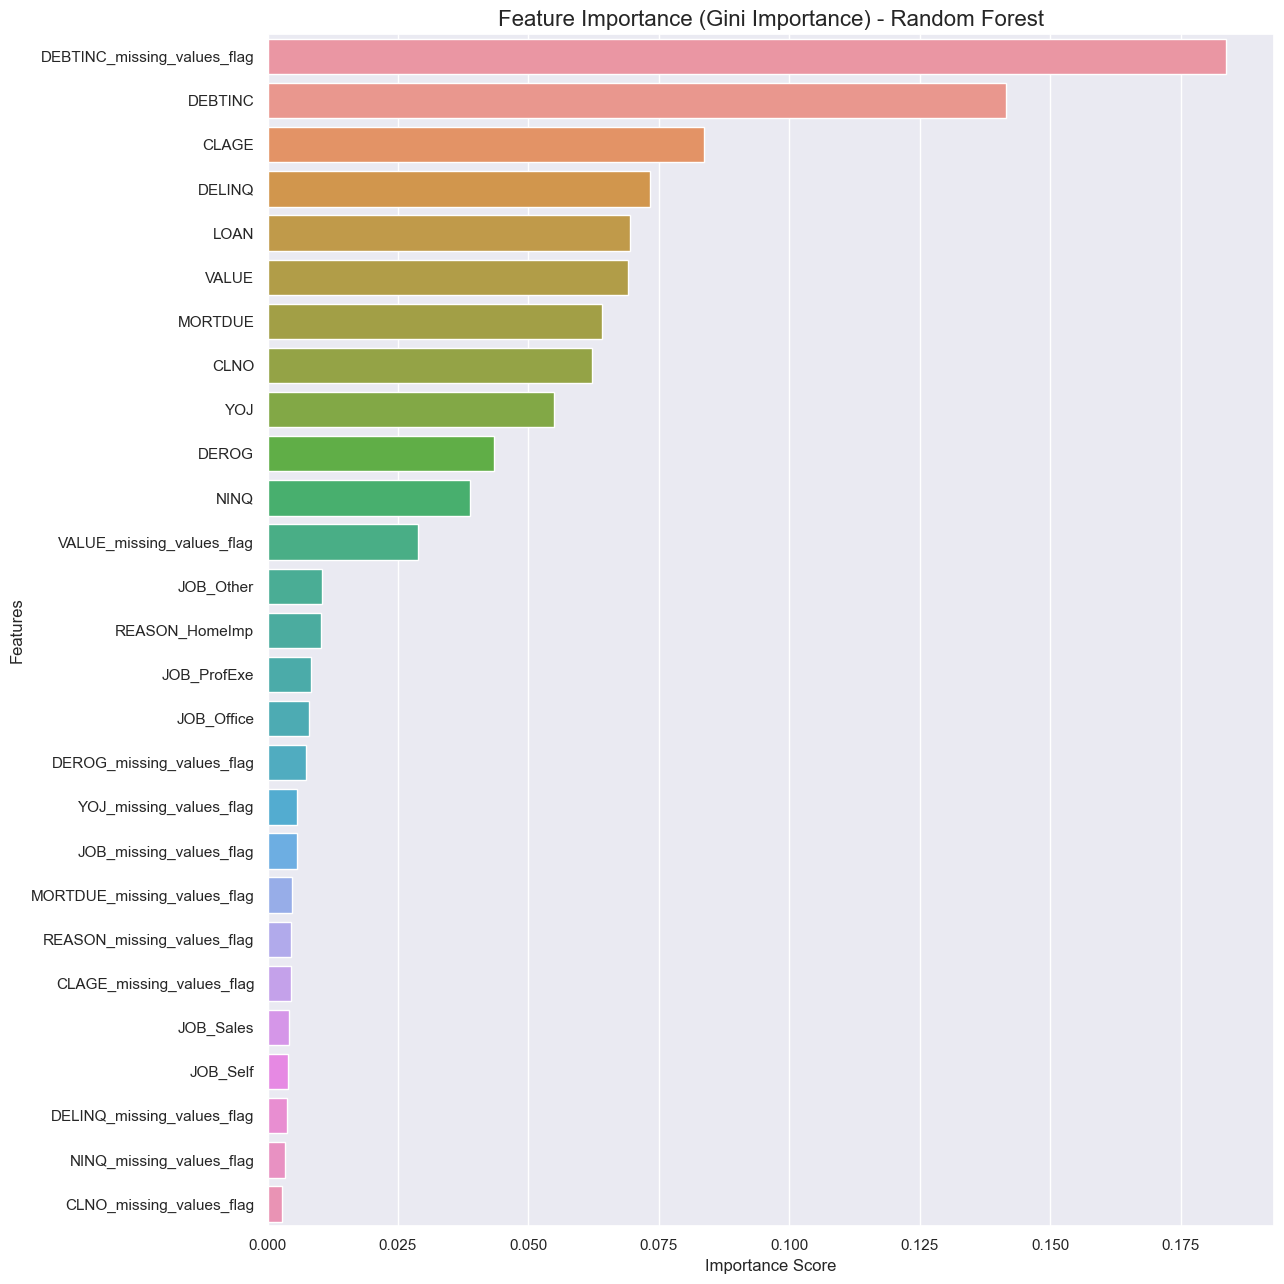

In [91]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
# Remove _________ and complete the code

importances = rf.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))

# ✅ Correct way to call barplot
sns.barplot(x='Importance', y=importance_df.index, data=importance_df)

plt.title('Feature Importance (Gini Importance) - Random Forest', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


**Build a Random Forest model with Class Weights**¶
===================================================




In [92]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}


rf_CW = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Fitting Random Forest model

rf_CW.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)


#### Checking the performance on the train dataset¶




              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



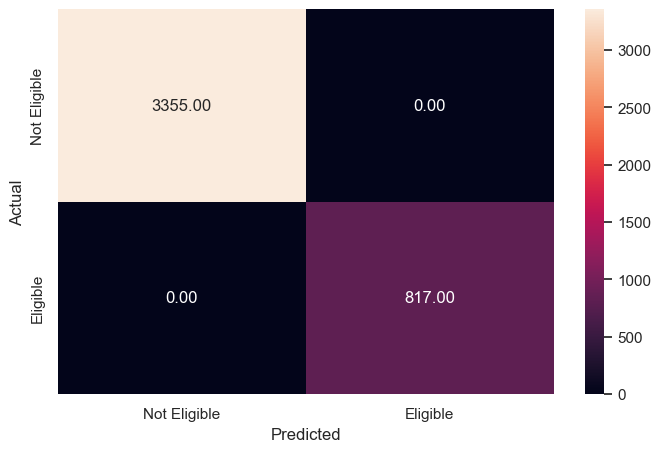

In [93]:
# Checking performance on the train data

Y_pred_train_rf = rf_CW.predict(X_train)

metrics_score(Y_train, Y_pred_train_rf)


#### Checking the performance on the test dataset




              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1416
           1       0.86      0.67      0.75       372

    accuracy                           0.91      1788
   macro avg       0.89      0.82      0.85      1788
weighted avg       0.90      0.91      0.90      1788



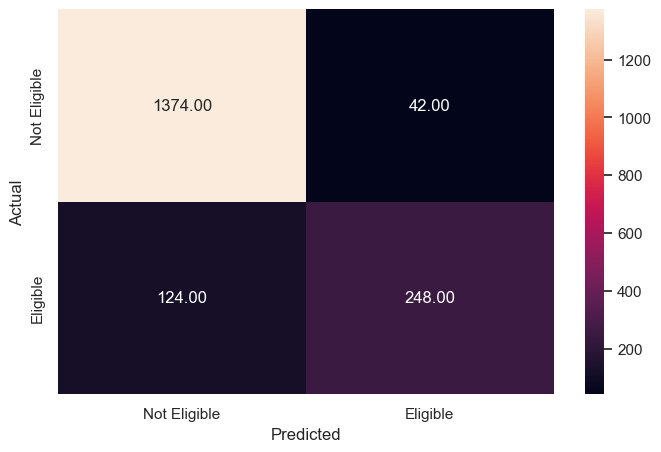

In [95]:
# Checking performance on the test data

Y_pred_test_rf = rf_CW.predict(X_test)

metrics_score(Y_test, Y_pred_test_rf)


**Insights:**


* The Random Forest model with **Class Weights** delivers **very similar performance** to the Random Forest model without Class Weights. Both models achieve comparable metrics in terms of precision, recall, F1-score, and overall accuracy on the test dataset. This indicates that applying class weighting does not significantly impact the model’s ability to differentiate between eligible and not eligible classes. Therefore, **the class weighting technique is not contributing to noticeable performance improvements** in this case, suggesting that the Random Forest inherently handles the class imbalance effectively within this dataset.



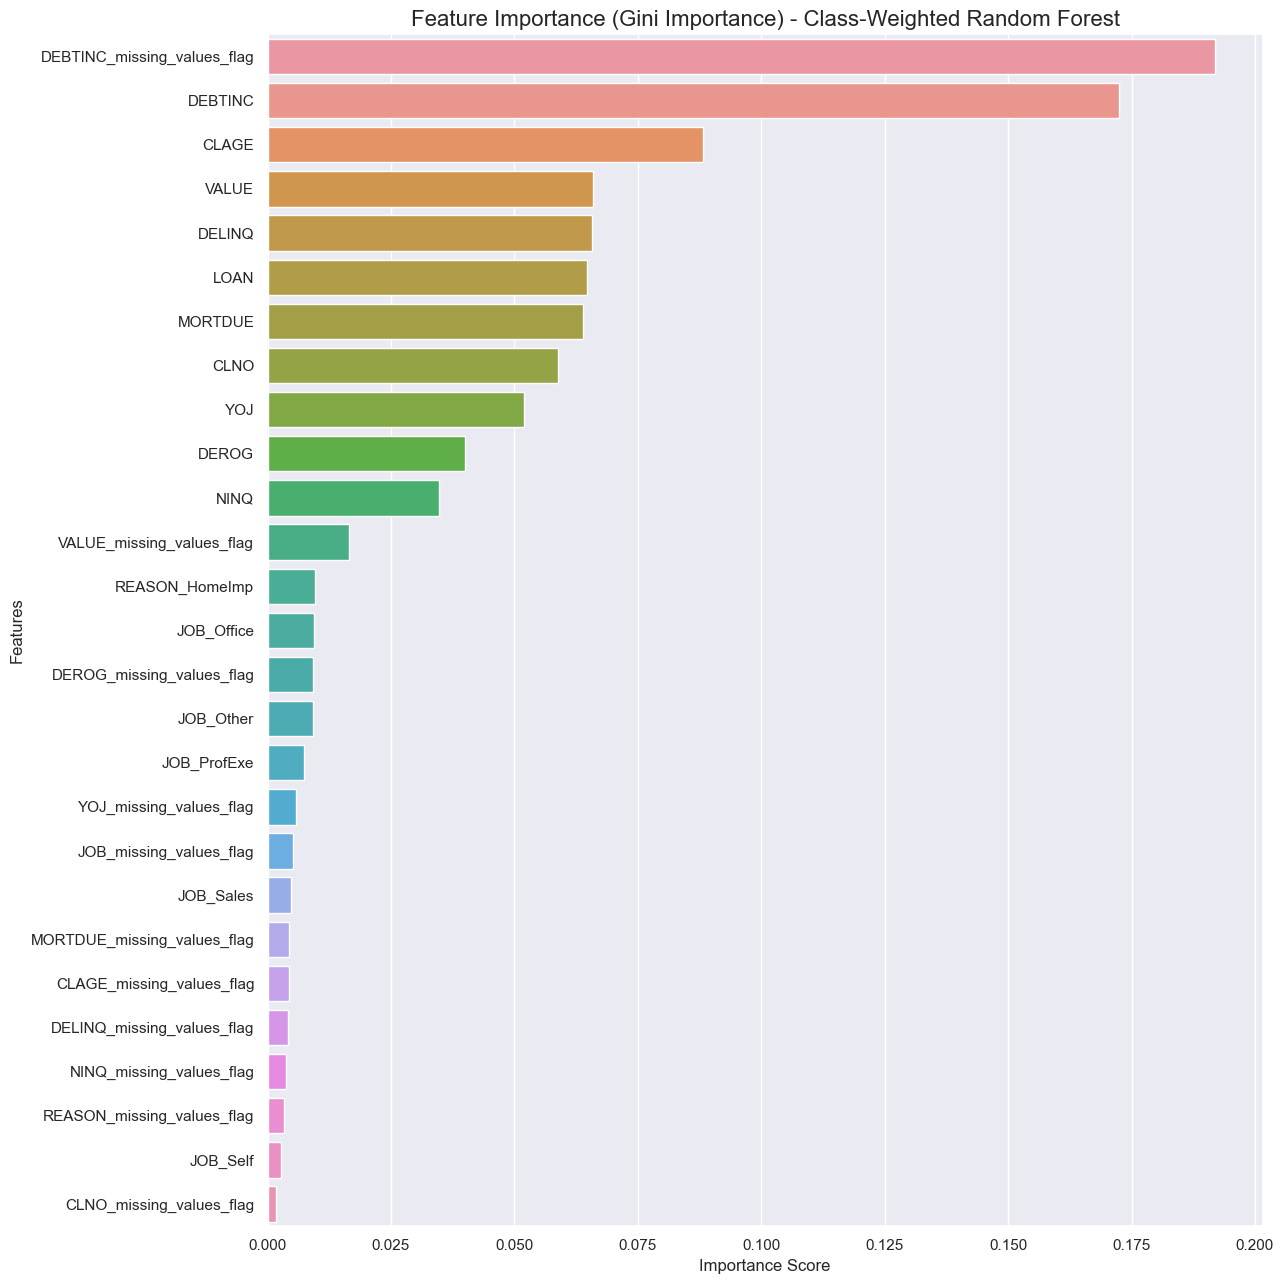

In [96]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset

importances = rf_CW.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))

sns.barplot(x='Importance', y=importance_df.index, data=importance_df)

plt.title('Feature Importance (Gini Importance) - Class-Weighted Random Forest', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()



### **Tuning the Random Forest**




## 🎯 Hyperparameter Tuning with Grid Search – Random Forest

#### 🔍 Why is Hyperparameter Tuning Important?
Hyperparameter tuning is challenging because there is no direct analytical method to determine how changes in hyperparameters will reduce model loss. Instead, we rely on experimentation and systematic search techniques to find the best configuration. One of the most effective methods is Grid Search, which performs an exhaustive search over a predefined set of hyperparameter values to find the optimal combination.

#### ⚙️ Key Random Forest Hyperparameters to Tune

**n_estimators:**

- Number of trees in the forest.

- Larger values generally improve performance but increase computation time.

**min_samples_split: **

- Minimum number of samples required to split an internal node.

- Controls how deep the tree grows and prevents overfitting.

**min_samples_leaf:**

- Minimum number of samples required to be at a leaf node.

- Ensures branches have enough samples to be statistically meaningful.

**max_features**

- Number of features considered when looking for the best split.

- Options include:

     - "auto" or "sqrt": Use √(number of features).

     - "log2": Use log2(number of features).

     - None: Use all features.

#### 🧪 GridSearchCV – How It Works

- GridSearchCV performs a cross-validated exhaustive search over a parameter grid.

- It trains models with every possible combination of the specified hyperparameters.

- For each combination, it evaluates performance using cross-validation scores to ensure the model generalizes well on unseen data.

- The best combination of parameters is selected based on a scoring metric (e.g., accuracy, F1-score).




#### **Warning:** This may take a long time depending on the parameters you tune.




In [97]:
# Choose the type of classifier. 

rf_estimator= RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1,oob_score=True,bootstrap=True)

# Grid of parameters to choose from

parameters={  
         "max_features": ['sqrt','log2',None, 65],
         "min_samples_leaf": np.arange(1, 15, 5),
         "min_samples_split": np.arange(2, 20, 5),
         "n_estimators":np.arange(10, 110, 10)}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring = 'recall', cv = 5, n_jobs=-1)

#fit the GridSearch on train dataset

grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters

rf_estimator= grid_obj.best_estimator_

# Fit the best algorithm to the data. 

rf_estimator.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_features='log2',
                       min_samples_leaf=11, n_estimators=10, oob_score=True,
                       random_state=1)


#### Checking the performance on the train dataset¶




              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3355
           1       0.68      0.87      0.76       817

    accuracy                           0.89      4172
   macro avg       0.82      0.88      0.85      4172
weighted avg       0.91      0.89      0.90      4172



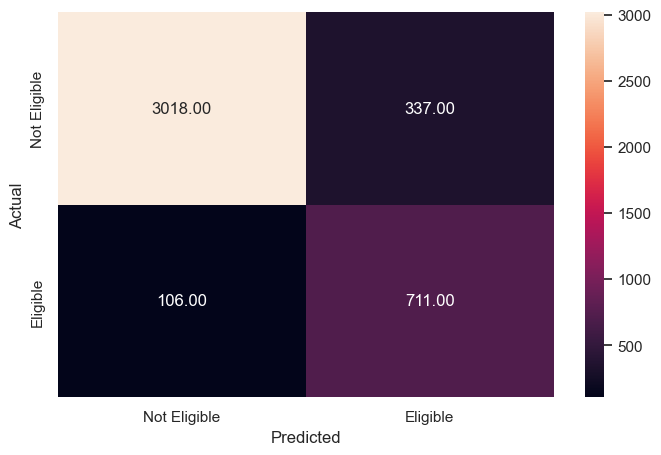

In [98]:
# Checking performance on the training data

Y_pred_train_rf_estimator = rf_estimator.predict(X_train)

metrics_score(Y_train, Y_pred_train_rf_estimator)


#### Checking the performance on the test dataset¶




              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1416
           1       0.67      0.78      0.72       372

    accuracy                           0.87      1788
   macro avg       0.80      0.84      0.82      1788
weighted avg       0.88      0.87      0.88      1788



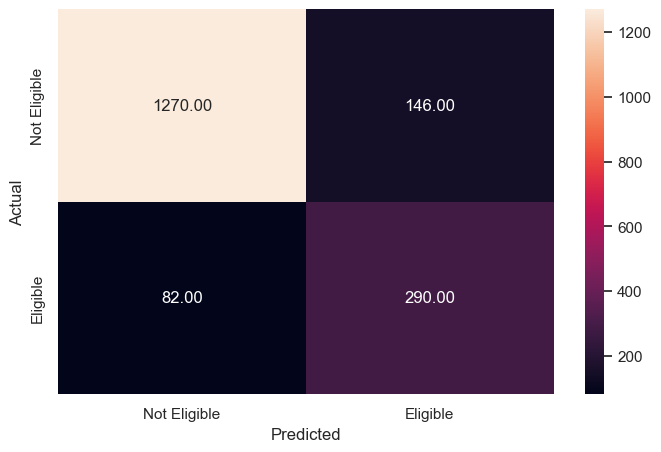

In [99]:
# Checking performace on test dataset


Y_pred_test_rf_estimator = rf_estimator.predict(X_test)

metrics_score(Y_test, Y_pred_test_rf_estimator)


**Insights:**

- The Random Forest model after hyperparameter tuning demonstrates solid performance on the training dataset, achieving a recall of 87% for the Eligible class and an accuracy of 89%, indicating that the model generalizes well without signs of overfitting.

- On the test dataset, the model maintains a comparable level of performance, achieving a recall of 78% for the Eligible class and an overall accuracy of 87%. Although there is a slight decrease in recall for the Not Eligible class compared to the training set, the model’s ability to detect Eligible (default loan) cases remains consistent and reliable.

- This model showcases robustness and practicality for business use, particularly in identifying potential loan defaults. With a 78% chance of correctly detecting default loans, it provides a strong predictive tool that can assist the company in proactively managing loan risk and making informed decisions.






#### Plot the Feature importance of the tuned Random Forest¶




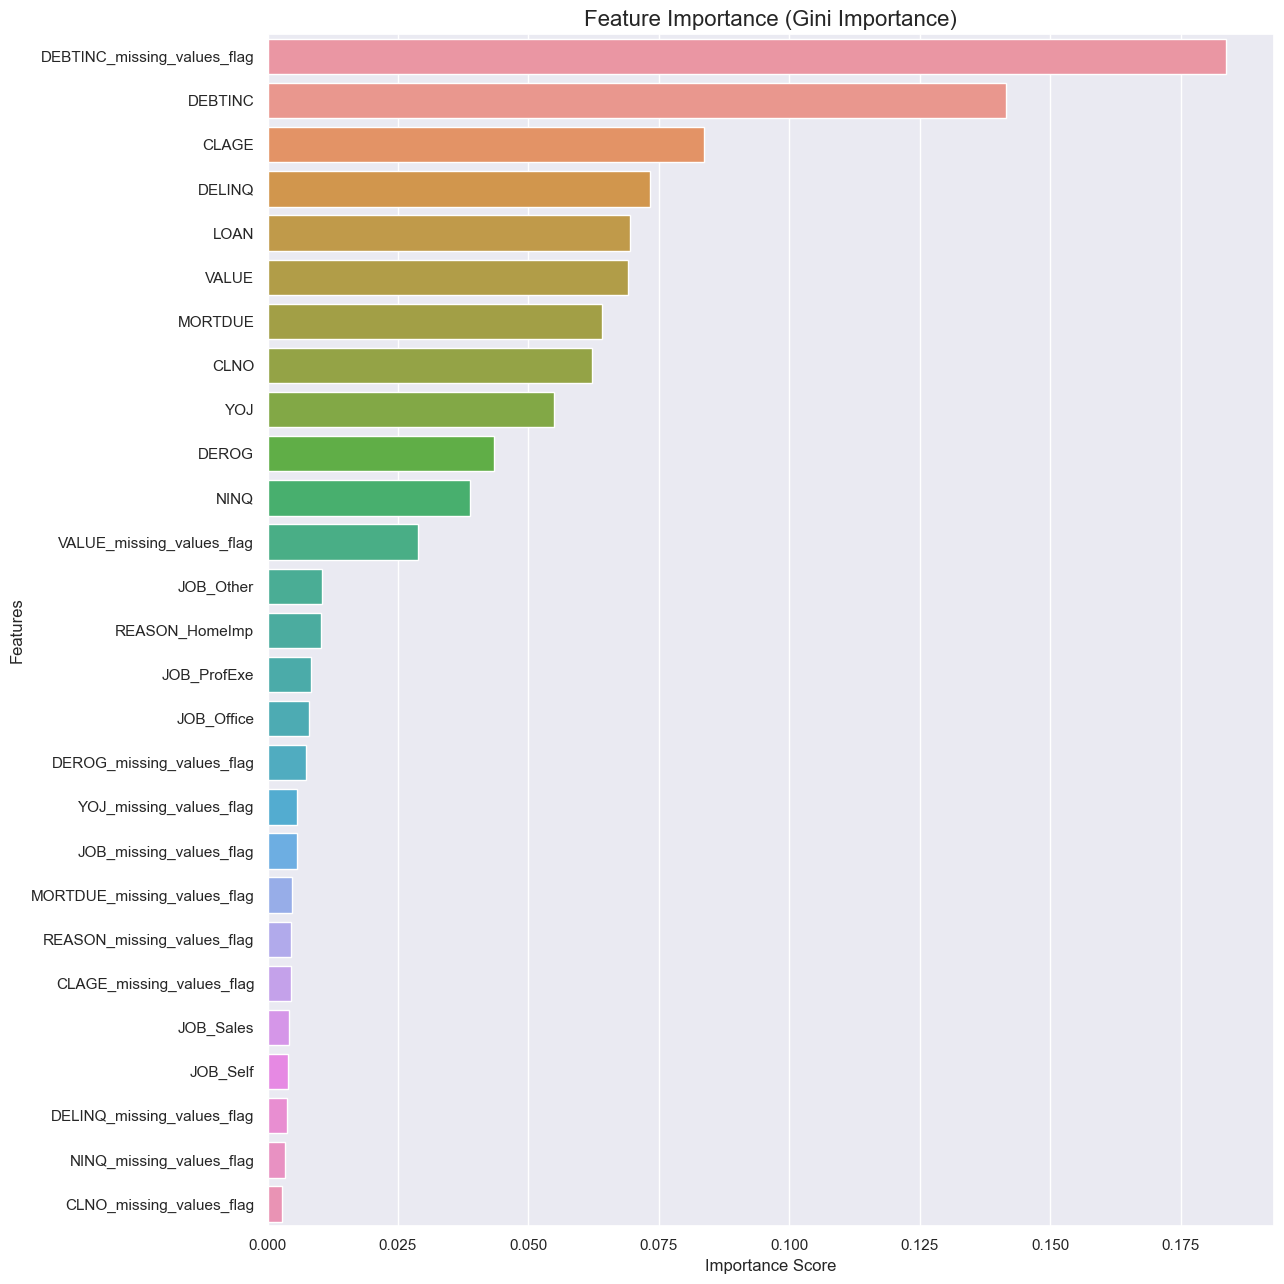

In [101]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset

importances = rf.feature_importances_  # or dtree_estimator.feature_importances_ (depending on your model)

columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))

sns.barplot(x='Importance', y=importance_df.index, data=importance_df)

plt.title('Feature Importance (Gini Importance)', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()



## Insights:

### 📊 Insights – Feature Importance (Gini Importance)

#### 1. Top Contributing Features:
- **DEBTINC_missing_values_flag** is the most dominant feature, indicating that the **presence or absence of Debt-to-Income (DEBTINC) information heavily influences predictions**.
- **DEBTINC** (actual Debt-to-Income ratio) is the second most critical factor, affirming its direct relationship to loan eligibility.
- **CLAGE** (Credit Line Age) and **DELINQ** (Number of Delinquencies) also play significant roles, reflecting the importance of a borrower’s credit history in the model.

#### 2. Financial Variables Dominate:
- Features such as **LOAN**, **VALUE** (Property Value), **MORTDUE** (Mortgage Due), **CLNO** (Number of Credit Lines), **YOJ** (Years on Job), and **DEROG** (Derogatory Reports) collectively contribute to the model’s decision-making.
- This emphasizes that financial health and credit behavior are primary predictors in the classification.

#### 3. Lesser Importance of Missing Flags & Job Titles:
- Other missing value flags (like **VALUE_missing_values_flag**, **DEROG_missing_values_flag**) and job categories (e.g., **JOB_ProfExe**, **JOB_Sales**, **JOB_Self**) have relatively **minimal impact** on the model.
- This suggests that **not all missing data indicators and categorical job types significantly influence the model’s splits**.

---

### 📌 Conclusion:
The model’s predictions are **heavily influenced by debt-related metrics and credit behavior variables**, with missing values in key financial fields (especially DEBTINC) acting as strong signals. Lesser impact from job categories indicates that **financial metrics outweigh occupation data in determining eligibility**.



### **Comparing Model Performances**




In [102]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(Y_train,pred_train)
    test_recall = metrics.recall_score(Y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(Y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(Y_test,pred_test))
    
    return a # returning the list with train and test scores

In [103]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(Y_train,pred_train)
    test_precision = metrics.precision_score(Y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(Y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(Y_test,pred_test))

    return b # returning the list with train and test scores

In [104]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,Y_train)
    test_acc = model.score(X_test,Y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,Y_train))
        print("Accuracy on test set : ",model.score(X_test,Y_test))
    
    return c # returning the list with train and test scores

In [105]:
# Make the list of all the model names 

models = [log,log_weight,dt, dtree_estimator,rf, rf_CW, rf_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [106]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]

comparison_frame = pd.DataFrame({'Model':['log','log_weight','dt', 'dtree_estimator','rf', 'rf_CW','rf_estimator'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
0              log        0.876318       0.876957      0.599755     0.577957   
1       log_weight        0.843241       0.844519      0.776010     0.744624   
2               dt        1.000000       0.868568      1.000000     0.629032   
3  dtree_estimator        0.854027       0.843400      0.828641     0.790323   
4               rf        1.000000       0.913311      1.000000     0.701613   
5            rf_CW        1.000000       0.907159      1.000000     0.666667   
6     rf_estimator        0.893816       0.872483      0.870257     0.779570   

   Train_Precision  Test_Precision  
0         0.721649        0.773381  
1         0.573756        0.602174  
2         1.000000        0.706949  
3         0.590750        0.592742  
4         1.000000        0.855738  
5         1.000000        0.855172  
6         0.678435        0.665138


**Insights: ***\_\_*****


* According to this comparing we can see that’s the logistic regression performed poorly on the train and test data. The dt, rf and rf\_CW models are overfitting the train data and the test recall of those model is between 054 and 0.70. That's mean the models are not doing well in prediction of loan default.


* dtree\_estimor and rf\_estimator\_tuned model is giving better performance compared to those models. The 2 model are not overfitting de model on the train data. They have approximately same recall on the test data,79% for dtee\_estimor model and 78% for rf\_estimor model but rf\_estimator model has better accuracy ~ 87%.






# 📊 Model Performance Comparison & Final Recommendation

## 1. Refined Insights – Most Meaningful Findings Relevant to Loan Default Prediction

- Across all models, the **Debt-to-Income (DEBTINC) missing values flag** emerges as the most critical feature for predicting loan defaults. This makes sense, as missing debt-to-income information might indicate a riskier profile or incomplete financial documentation.
  
- Key financial features such as **DEBTINC (actual Debt-to-Income ratio)**, **CLAGE (Age of Credit Line)**, **VALUE (Property Value)**, **LOAN (Loan Amount)**, **MORTDUE (Outstanding Mortgage)**, **CLNO (Number of Credit Lines)**, **YOJ (Years on Job)**, and **NINQ (Number of Recent Inquiries)** also play a major role in prediction.

- On the other hand, variables like **DEROG (Major Derogatory Reports)** and **DELINQ (Delinquent Credit Lines)** have minimal impact, suggesting these features can be **excluded to simplify the model**.

- **Job types (employment categories)** show negligible influence on the model’s decision-making, implying that the bank should explore **more direct income verification methods** rather than relying on occupation.

- The **Debt-to-Credit Ratio is the most significant indicator** of loan default risk. The bank should prioritize monitoring and validating this metric for loan applicants.

---

## 2. Model Comparison – Relative Performance of Techniques

| Model                  | Train Accuracy | Test Accuracy | Train Recall | Test Recall | Train Precision | Test Precision |
|------------------------|----------------|---------------|--------------|-------------|-----------------|----------------|
| Logistic Regression (log)       | 87.6%          | 87.7%         | 60.0%        | 57.8%       | 72.2%           | 77.3%          |
| Logistic Regression (class weights) | 84.3%          | 84.5%         | 77.6%        | 74.5%       | 57.4%           | 60.2%          |
| Decision Tree (dt)              | 100%           | 86.9%         | 100%         | 62.9%       | 100%            | 70.7%          |
| Tuned Decision Tree (dtree_estimator) | 85.4%          | 84.3%         | 82.9%        | 79.0%       | 59.1%           | 59.3%          |
| Random Forest (rf)              | 100%           | 91.3%         | 100%         | 70.2%       | 100%            | 85.6%          |
| Random Forest (class weights)   | 100%           | 90.7%         | 100%         | 66.7%       | 100%            | 85.5%          |
| Tuned Random Forest (rf_estimator) | 89.4%          | 87.2%         | 87.0%        | 77.9%       | 67.8%           | 66.5%          |

### Observations:
- **Logistic Regression (both versions)** performs poorly compared to tree-based models, especially on recall for the default class.
- **Decision Tree and Random Forest without tuning severely overfit** on the training data, leading to poor generalization (drop in test recall).
- **Class weighting slightly improved recall for Logistic Regression but had minimal impact on Random Forest.**
- **Hyperparameter tuning significantly improved model balance**, especially for **dtree_estimator** and **rf_estimator**, reducing overfitting while maintaining high recall on test data.
- **rf_estimator (Tuned Random Forest)** achieved the best balance with **Test Accuracy ~87%** and **Test Recall ~78%**, while the **dtree_estimator** achieved a similar recall (~79%) but with lower precision.

---

## 3. Proposal for Final Solution Design

### 🎯 Recommended Model:
- **Random Forest Hyperparameter Tuned Model (rf_estimator)**

### ✔️ Why This Model?
- The **goal for the bank is to maximize recall**, ensuring loans that are likely to default are correctly identified.
- The **rf_estimator model achieves the best balance between accuracy and recall**, with **Test Recall of 78%**, high precision, and no severe overfitting.
- Compared to Logistic Regression and untuned models, this tuned Random Forest is more robust to noise and variance in the dataset.
- The model can be further monitored and optimized (e.g., retraining with updated data quarterly) to ensure long-term performance stability.

---

## 🔑 Actionable Recommendations:
1. Simplify the model by **removing non-influential features** (DEROG, DELINQ, Job Titles).
2. Focus efforts on validating and ensuring **Debt-to-Income ratio completeness**.
3. Adopt the **Tuned Random Forest Model** as the default loan eligibility scoring mechanism.
4. Continuously monitor **recall performance on real-world data** and fine-tune thresholds if necessary.
